<a href="https://colab.research.google.com/github/rodriguessdeyson/feature-comparison/blob/master-artefacts/Detection_and_Feature_Selection_Comparison_Exploratory_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparação de feature extraction para detecção e classificação falhas em máquinas rotativas - Análise Exploratória

Deyson Alves Rodrigues

Este script apresenta as etapas de exploração de dados, etapa existente no fluxo de aplicativos de Machine Learning, com o intuito de se obter insights a partir das análises.

Os dados aqui tratados são sinais de acelerômetros/proxímetros posicionados nas posições radial, axial e tangêncial de mancais de deslizamento obtidos de medições reais.


# Carregando os Dados

Com o intuito de conhecer o dataset a ser utilizado, avaliamos suas informações.

Os dados consistem de sinais de vibração, adquiridos de sensores acelerômetros e  microfones nas posições radial, axial e tangêncial, adquiridos em 50kHz, durante 5 segundos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import os

# Incializa o serviço do Google Drive.
drive.mount('/content/drive')


#
# Leitura dos diretórios dos datasets.
#

# Dados classificados como normal.
dirNormal = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/normal'

# Dados classificados com desbalanceamento com massa de 6g.
dirImb6 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/imbalance/6g'

# Dados classificados com desbalanceamento com massa de 10g.
dirImb10 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/imbalance/10g'

# Dados classificados com desbalanceamento com massa de 15g.
dirImb15 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/imbalance/15g'

# Dados classificados com desbalanceamento com massa de 20g.
dirImb20 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/imbalance/20g'

# Dados classificados com desbalanceamento com massa de 25g.
dirImb25 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/imbalance/25g'

# Dados classificados com desbalanceamento com massa de 30g.
dirImb30 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/imbalance/30g'

# Dados classificados com desbalanceamento com massa de 35g.
dirImb35 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/imbalance/35g'

# Dados classificados com desalinhamento horizontal de 0.5mm.
dirHMis05 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/horizontal/0.5mm'

# Dados classificados com desalinhamento horizontal de 1.0mm.
dirHMis10 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/horizontal/1.0mm'

# Dados classificados com desalinhamento horizontal de 1.5mm.
dirHMis15 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/horizontal/1.5mm'

# Dados classificados com desalinhamento horizontal de 2.0mm.
dirHMis20 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/horizontal/2.0mm'

# Dados classificados com desalinhamento vertical de 0.51mm.
dirVMis51 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/vertical/0.51mm'

# Dados classificados com desalinhamento vertical de 0.63mm.
dirVMis063 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/vertical/0.63mm'

# Dados classificados com desalinhamento vertical de 1.27mm.
dirVMis127 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/vertical/1.27mm'

# Dados classificados com desalinhamento vertical de 1.40mm.
dirVMis140 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/vertical/1.40mm'

# Dados classificados com desalinhamento vertical de 1.78mm.
dirVMis178 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/vertical/1.78mm'

# Dados classificados com desalinhamento vertical de 1.90mm.
dirVMis190 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/misalignment/vertical/1.90mm'

dirBF0 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/ball/0g'

dirBF6 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/ball/6g'

dirBF20 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/ball/20g'

dirBF35 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/ball/35g'

dirCF0 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/cage/0g'

dirCF6 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/cage/6g'

dirCF20 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/cage/20g'

dirCF35 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/cage/35g'

dirOF0 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/outter/0g'

dirOF6 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/outter/6g'

dirOF20 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/outter/20g'

dirOF35 = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/new dataset/bearing-fault/outter/35g'

# Dataset completo.
#df = pd.read_csv('/content/drive/MyDrive/Mestrado/Final Project/Data Exploration/2019_12_19 12_22_30.333.650.csv', sep = ',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#
# Processa os arquivos .csv do dataset adicionando suas identificações de colunas.
#

# Dataset Normal
#for file in os.listdir(dirNormal):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirNormal + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirNormal + '/' + file, index=False) # save to new csv file
#    print(df)
#
#for file in os.listdir(dirImb6):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirImb6 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirImb6 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirImb10):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirImb10 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirImb10 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirImb15):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirImb15 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirImb15 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirImb20):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirImb20 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirImb20 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirImb25):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirImb25 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirImb25 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirImb30):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirImb30 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirImb30 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirImb35):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirImb35 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirImb35 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirHMis05):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirHMis05 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirHMis05 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirHMis10):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirHMis10 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirHMis10 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirHMis15):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirHMis15 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirHMis15 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirHMis20):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirHMis20 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirHMis20 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirVMis51):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirVMis51 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirVMis51 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirVMis063):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirVMis063 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirVMis063 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirVMis127):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirVMis127 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirVMis127 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirVMis140):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirVMis140 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirVMis140 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirVMis178):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirVMis178 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirVMis178 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirVMis190):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirVMis190 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirVMis190 + '/' + file, index=False) # save to new csv file
#    print(df)

# Novo
#for file in os.listdir(dirBF0):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirBF0 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirBF0 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirBF6):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirBF6 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirBF6 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirBF20):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirBF20 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirBF20 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirBF35):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirBF35 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirBF35 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirCF0):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirCF0 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirCF0 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirCF6):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirCF6 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirCF6 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirCF20):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirCF20 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirCF20 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirCF35):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirCF35 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirCF35 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirOF0):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirOF0 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirOF0 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirOF6):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirOF6 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirOF6 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirOF20):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirOF20 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirOF20 + '/' + file, index=False) # save to new csv file
#    print(df)

#for file in os.listdir(dirOF35):
#  print(file)
#  if file.endswith(".csv"):
#    df = pd.read_csv(dirOF35 + '/' + file, header=None)
#    df.rename(columns={0: 'tachometer', 1: 'uhb_axial', 2:'uhb_radiale', 3:'uhb_tangential', 4:'ohb_axial', 5:'ohb_radiale', 6:'ohb_tangential', 7:'mic'}, inplace=True)
#    df.to_csv(dirOF35 + '/' + file, index=False) # save to new csv file
#  print(df)

61.44.csv
        tachometer  uhb_axial  uhb_radiale  uhb_tangential  ohb_axial  \
0         -1.04820     1.6012     0.114000        0.481250    2.54960   
1         -1.04350     1.8143     0.792820        0.437130    2.50440   
2         -1.16330     0.9327    -0.029529        0.030781    2.49160   
3         -1.10410     1.2048     0.441370       -0.250800    2.55640   
4         -0.98435     0.7302    -0.105170       -0.356830    2.50160   
...            ...        ...          ...             ...        ...   
249995     4.17960     1.3241    -1.540300        0.051957    1.18450   
249996     4.17560     1.3971    -0.943960       -0.116720    1.05840   
249997     4.18460     1.0903    -1.760100       -0.183570    0.89589   
249998     4.17230     1.6490    -1.402200        0.010195    0.83814   
249999     4.18740     1.3794    -2.029500        0.333900    0.83002   

        ohb_radiale  ohb_tangential       mic  
0           0.35498       -0.574350  0.096599  
1           0.385

FileNotFoundError: ignored

# Conhecendo a Estrutura dos Dados
Para iniciar o processo de exploração, uma parte dos dados pode ser visualizados.
Apenas uma amostra dos dados será exibida.
Atualmente há 25 amostras para cada classificação

In [ ]:
# Carregando algumas informações dos dados (apenas uma amostra)

# Dados classificados como normal.
dsNormal = pd.read_csv(dirNormal + '/12.288.csv', sep = ',')

# Dados classificados com desbalanceamento com massa de 6g.
dsImb6 = pd.read_csv(dirImb6 + '/20.2752.csv', sep = ',')

# Dados classificados com desbalanceamento com massa de 10g.
dsImb10 = pd.read_csv(dirImb10 + '/25.6.csv', sep = ',')

# Dados classificados com desbalanceamento com massa de 15g.
dsImb15 = pd.read_csv(dirImb15 + '/17.8176.csv', sep = ',')

# Dados classificados com desbalanceamento com massa de 20g.
dsImb20 = pd.read_csv(dirImb20 + '/52.224.csv', sep = ',')

# Dados classificados com desbalanceamento com massa de 25g.
dsImb25 = pd.read_csv(dirImb25 + '/39.5264.csv', sep = ',')

# Dados classificados com desbalanceamento com massa de 30g.
dsImb30 = pd.read_csv(dirImb30 + '/36.864.csv', sep = ',')

# Dados classificados com desbalanceamento com massa de 35g.
dsImb35 = pd.read_csv(dirImb35 + '/38.5024.csv', sep = ',')

# Dados classificados com desalinhamento horizontal de 0.5mm.
dsHMis05 = pd.read_csv(dirHMis05 + '/47.7184.csv', sep = ',')

# Dados classificados com desalinhamento horizontal de 1.0mm.
dsHMis10 = pd.read_csv(dirHMis10 + '/46.8992.csv', sep = ',')

# Dados classificados com desalinhamento horizontal de 1.5mm.
dsHMis15 = pd.read_csv(dirHMis15 + '/50.5856.csv', sep = ',')

# Dados classificados com desalinhamento horizontal de 1.0mm.
dsHMis20 = pd.read_csv(dirHMis20 + '/12.288.csv', sep = ',')

# Dados classificados com desalinhamento vertical de 0.5mm.
dsVMis51 = pd.read_csv(dirVMis51 + '/54.4768.csv', sep = ',')

# Dados classificados com desalinhamento vertical de 1.0mm.
dsVMis63 = pd.read_csv(dirVMis063 + '/54.0672.csv', sep = ',')

# Dados classificados com desalinhamento vertical de 0.5mm.
dsVMis127 = pd.read_csv(dirVMis127 + '/12.0832.csv', sep = ',')

# Dados classificados com desalinhamento vertical de 1.0mm.
dsVMis140 = pd.read_csv(dirVMis140 + '/12.0832.csv', sep = ',')

# Dados classificados com desalinhamento vertical de 0.5mm.
dsVMis178 = pd.read_csv(dirVMis178 + '/12.4928.csv', sep = ',')

# Dados classificados com desalinhamento vertical de 1.0mm.
dsVMis190 = pd.read_csv(dirVMis190 + '/54.6816.csv', sep = ',')

# Dados classificados com falha em rolamentos.
dsBF0 = pd.read_csv(dirBF0 + '/42.1888.csv', sep = ',')
dsBF6 = pd.read_csv(dirBF6 + '/52.4288.csv', sep = ',')
dsBF20 = pd.read_csv(dirBF20 + '/52.0192.csv', sep = ',')
dsBF35 = pd.read_csv(dirBF35 + '/39.3216.csv', sep = ',')

dsCF0 = pd.read_csv(dirCF0 + '/52.8384.csv', sep = ',')
dsCF6 = pd.read_csv(dirCF6 + '/40.3456.csv', sep = ',')
dsCF20 = pd.read_csv(dirCF20 + '/31.9488.csv', sep = ',')
dsCF35 = pd.read_csv(dirCF35 + '/46.4896.csv', sep = ',')

dsOF0 = pd.read_csv(dirOF0 + '/40.7552.csv', sep = ',')
dsOF6 = pd.read_csv(dirOF6 + '/47.104.csv', sep = ',')
dsOF20 = pd.read_csv(dirOF20 + '/21.0944.csv', sep = ',')
dsOF35 = pd.read_csv(dirOF35 + '/13.1072.csv', sep = ',')

In [ ]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(StationaryPortion['EA20_VMGT-315_mms'][:1000])

# Visualizando os dados

A visualização dos dados permite entender como o este se comporta, permite a detecção de sugeiras entre outros. É uma parte importante para criação de relação e avaliar quais componentes (atributos) podem ser mantidas nas análises.

Para esse caso, a visualização do histograma para verificar a distruibuição dos dados é importante. Como mencionado anteriormente, os dados se encontram bem distruibuídos, conforme visualizado nos plots abaixo.

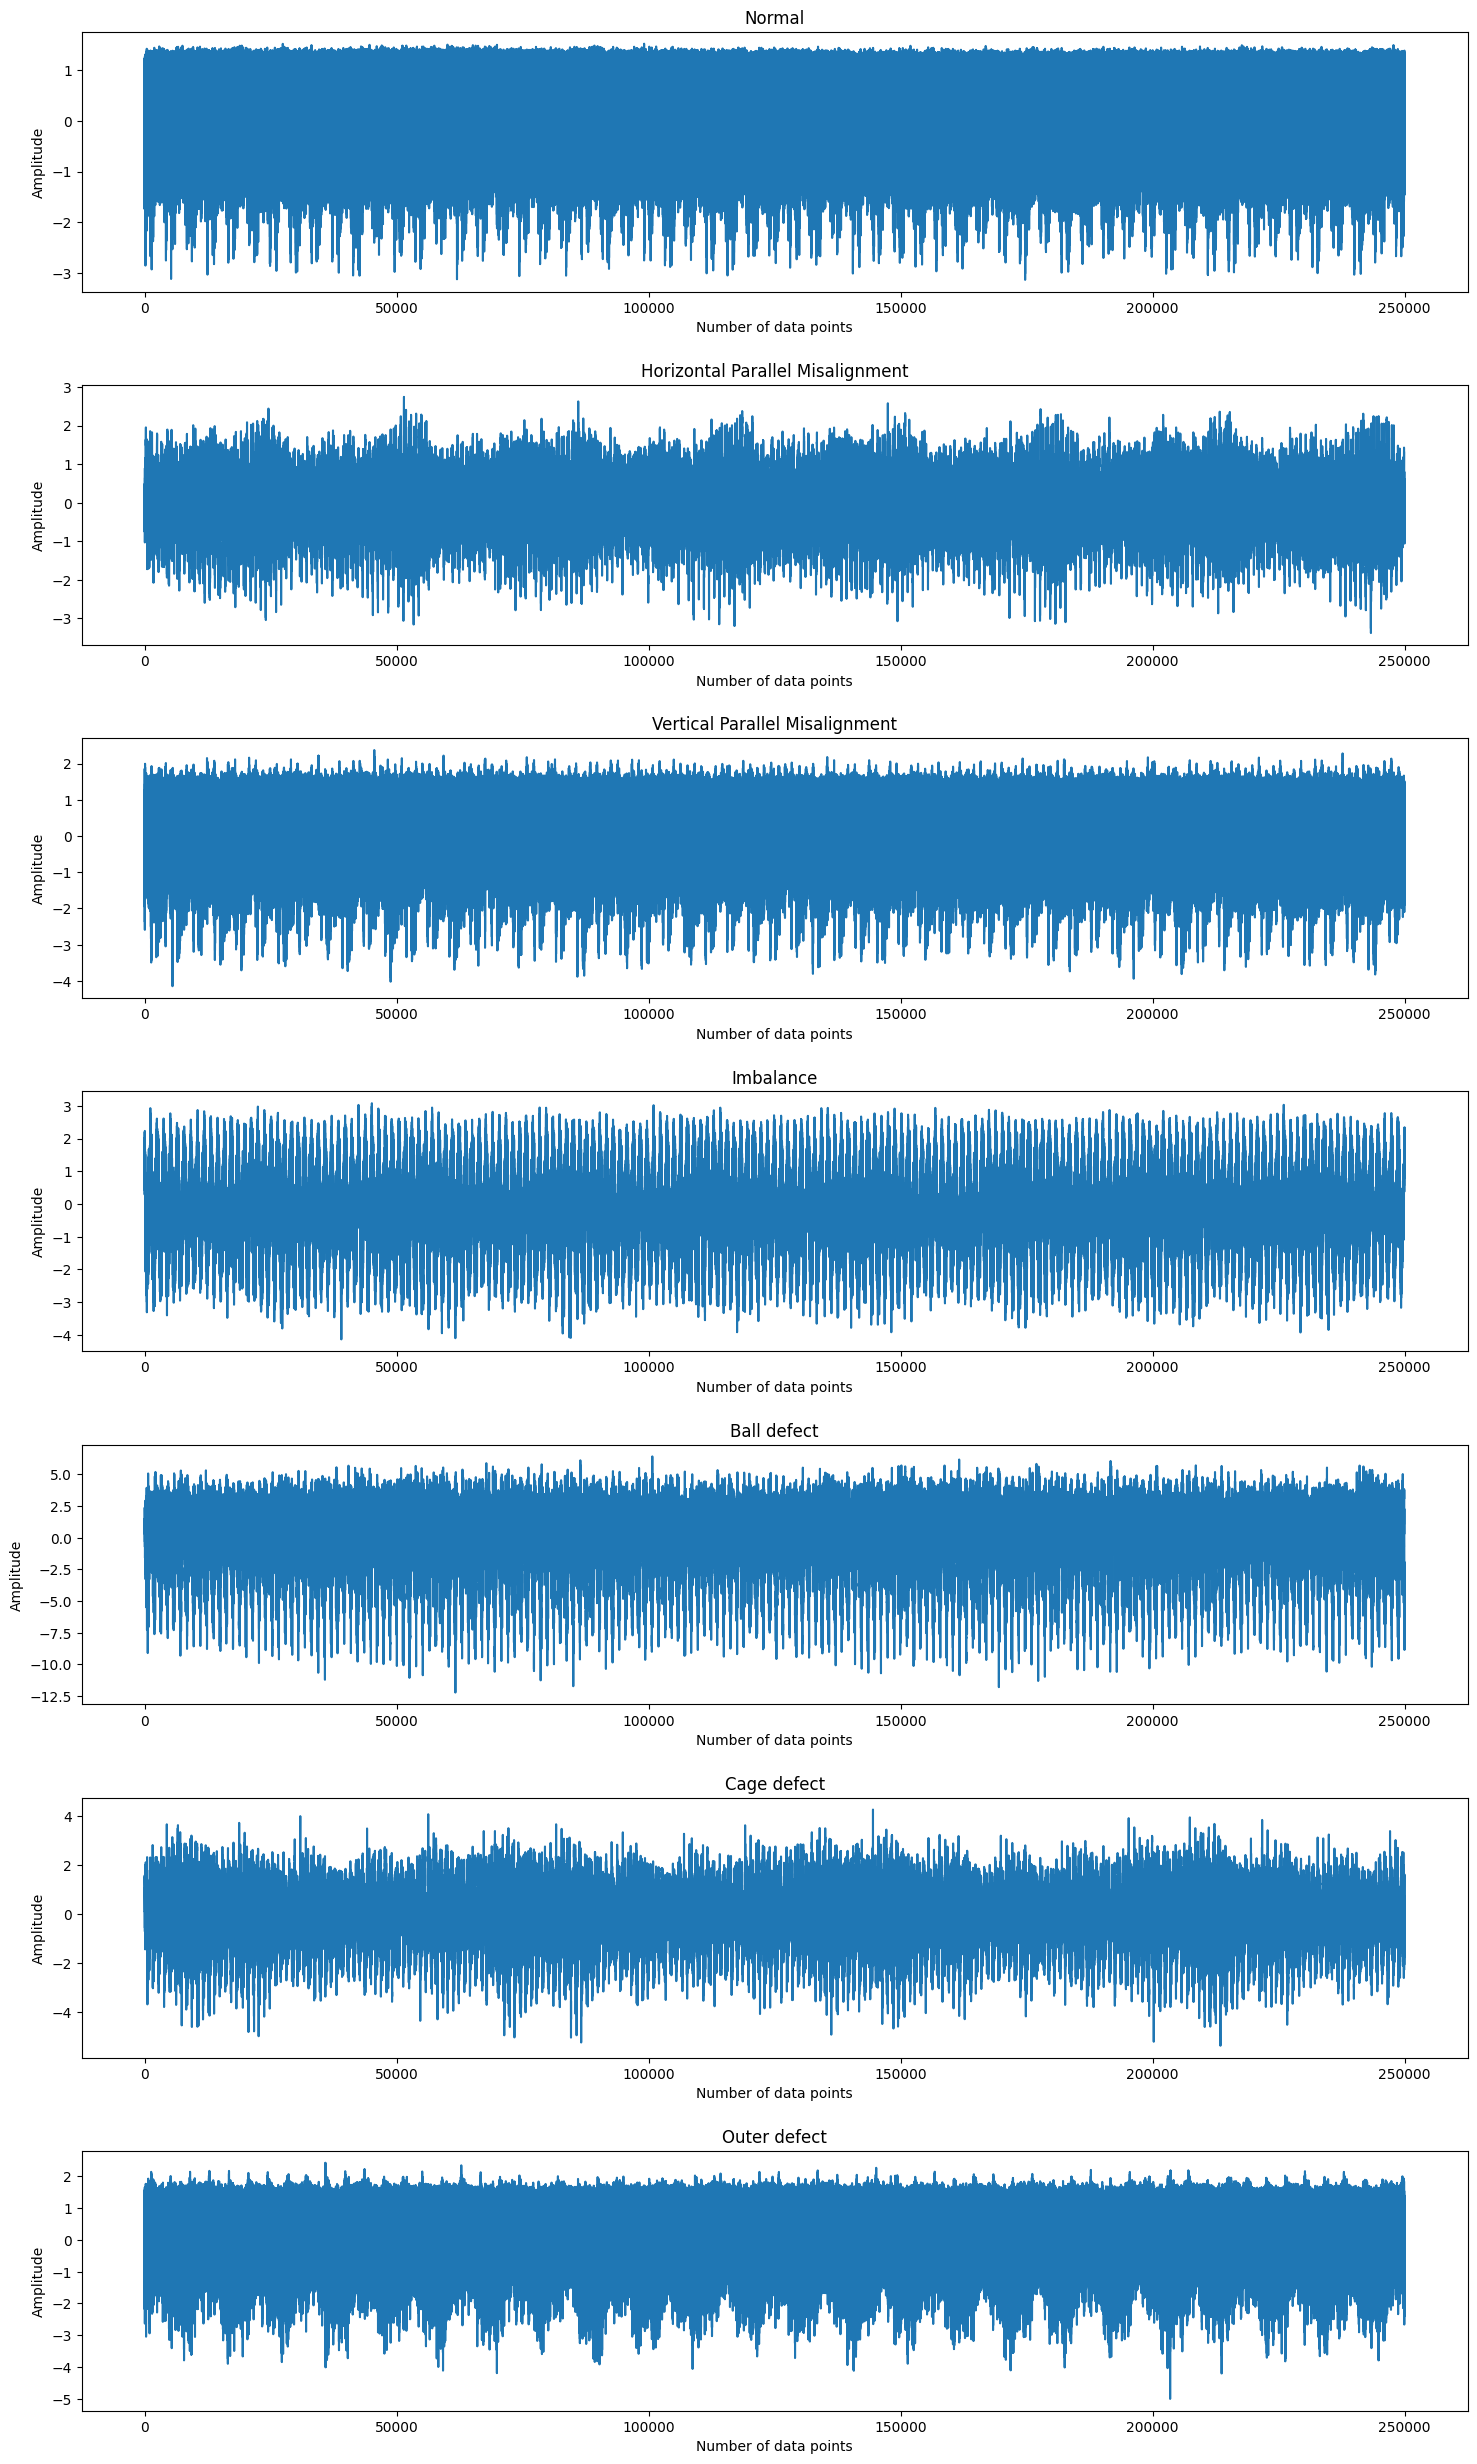

In [ ]:
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(7,1, figsize = (15,25))
n = sns.lineplot(data=dsNormal, y="uhb_axial", x = np.arange(250000), ax = axes[0])
n.set(xlabel='Number of data points', ylabel='Amplitude')
n.set(title = "Normal")

dh = sns.lineplot(data=dsHMis15, y="uhb_axial", x = np.arange(250000), ax = axes[1])
dh.set(xlabel='Number of data points', ylabel='Amplitude')
dh.set(title = "Horizontal Parallel Misalignment")

dv = sns.lineplot(data=dsVMis140, y="uhb_axial", x = np.arange(250000), ax = axes[2])
dv.set(xlabel='Number of data points', ylabel='Amplitude')
dv.set(title = "Vertical Parallel Misalignment")

imb = sns.lineplot(data=dsImb35, y="uhb_axial", x = np.arange(250000), ax = axes[3])
imb.set(xlabel='Number of data points', ylabel='Amplitude')
imb.set(title = "Imbalance")

bp = sns.lineplot(data=dsBF35, y="uhb_axial", x = np.arange(250000), ax = axes[4])
bp.set(xlabel='Number of data points', ylabel='Amplitude')
bp.set(title = "Ball defect")

cp = sns.lineplot(data=dsCF35, y="uhb_axial", x = np.arange(250000), ax = axes[5])
cp.set(xlabel='Number of data points', ylabel='Amplitude')
cp.set(title = "Cage defect")

op = sns.lineplot(data=dsOF35, y="uhb_axial", x = np.arange(250000), ax = axes[6])
op.set(xlabel='Number of data points', ylabel='Amplitude')
op.set(title = "Outer defect")

fig.tight_layout(pad=2.0)

Dataset Normal


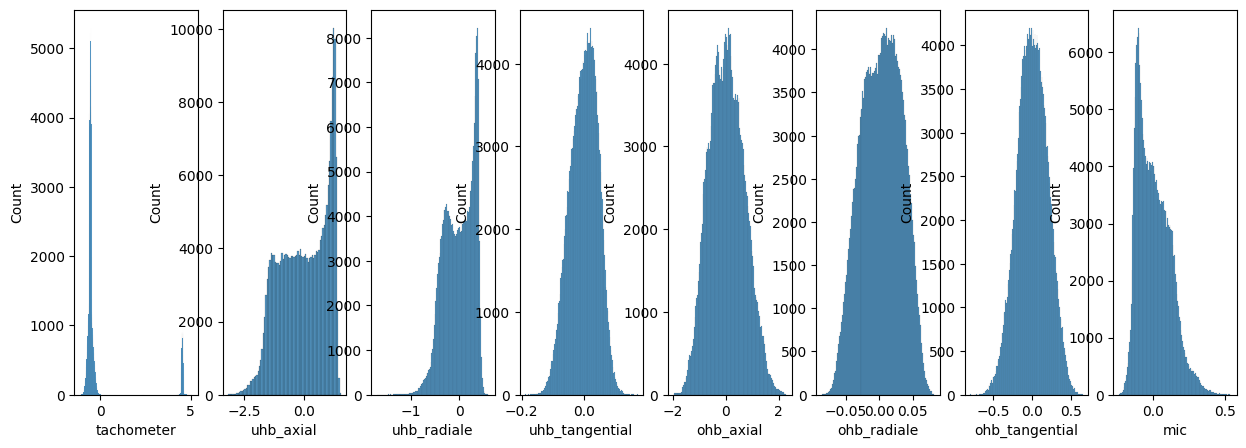

In [ ]:
import seaborn as sns

print("Dataset Normal")

fig, axes = plt.subplots(1,8, figsize = (15,5))

sns.histplot(data=dsNormal, x="tachometer", ax = axes[0])
sns.histplot(data=dsNormal, x="uhb_axial", ax = axes[1])
sns.histplot(data=dsNormal, x="uhb_radiale", ax = axes[2])
sns.histplot(data=dsNormal, x="uhb_tangential", ax = axes[3])
sns.histplot(data=dsNormal, x="ohb_axial", ax = axes[4])
sns.histplot(data=dsNormal, x="ohb_radiale", ax = axes[5])
sns.histplot(data=dsNormal, x="ohb_tangential", ax = axes[6])
sns.histplot(data=dsNormal, x="mic", ax = axes[7])

plt.show()

Dataset Desbalanceamento 6g


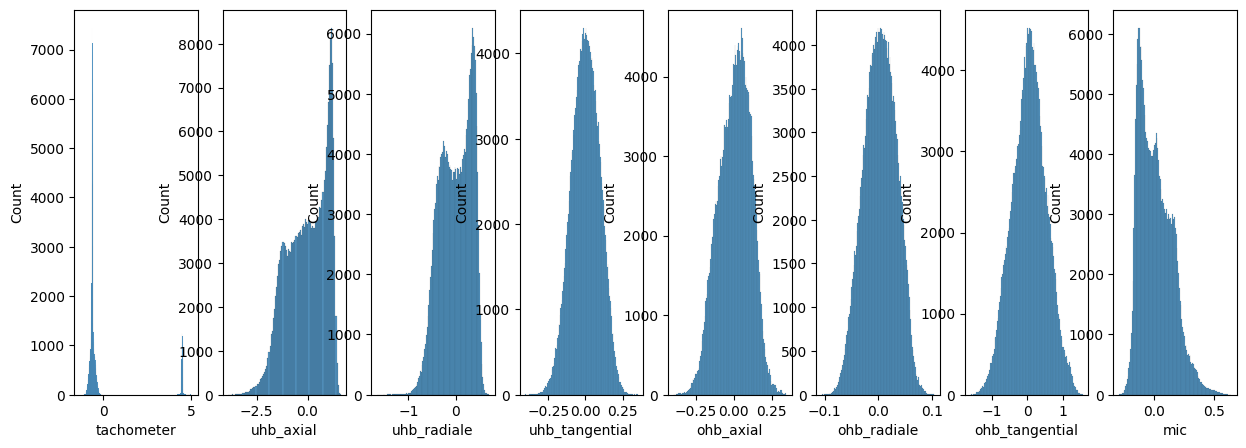

In [ ]:
import seaborn as sns

print("Dataset Desbalanceamento 6g")

fig, axes = plt.subplots(1,8, figsize = (15,5))

sns.histplot(data=dsImb6, x="tachometer", ax = axes[0])
sns.histplot(data=dsImb6, x="uhb_axial", ax = axes[1])
sns.histplot(data=dsImb6, x="uhb_radiale", ax = axes[2])
sns.histplot(data=dsImb6, x="uhb_tangential", ax = axes[3])
sns.histplot(data=dsImb6, x="ohb_axial", ax = axes[4])
sns.histplot(data=dsImb6, x="ohb_radiale", ax = axes[5])
sns.histplot(data=dsImb6, x="ohb_tangential", ax = axes[6])
sns.histplot(data=dsImb6, x="mic", ax = axes[7])

plt.show()

Dataset Desbalanceamento 15g


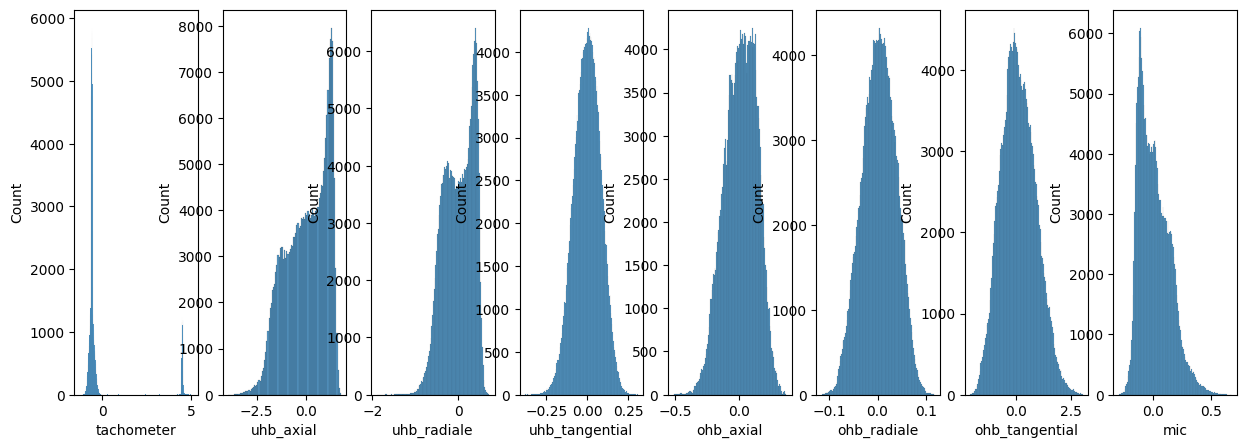

In [ ]:
import seaborn as sns

print("Dataset Desbalanceamento 15g")

fig, axes = plt.subplots(1,8, figsize = (15,5))

sns.histplot(data=dsImb15, x="tachometer", ax = axes[0])
sns.histplot(data=dsImb15, x="uhb_axial", ax = axes[1])
sns.histplot(data=dsImb15, x="uhb_radiale", ax = axes[2])
sns.histplot(data=dsImb15, x="uhb_tangential", ax = axes[3])
sns.histplot(data=dsImb15, x="ohb_axial", ax = axes[4])
sns.histplot(data=dsImb15, x="ohb_radiale", ax = axes[5])
sns.histplot(data=dsImb15, x="ohb_tangential", ax = axes[6])
sns.histplot(data=dsImb15, x="mic", ax = axes[7])

plt.show()

Dataset Desalinhamento Horizontal 0.5 mm


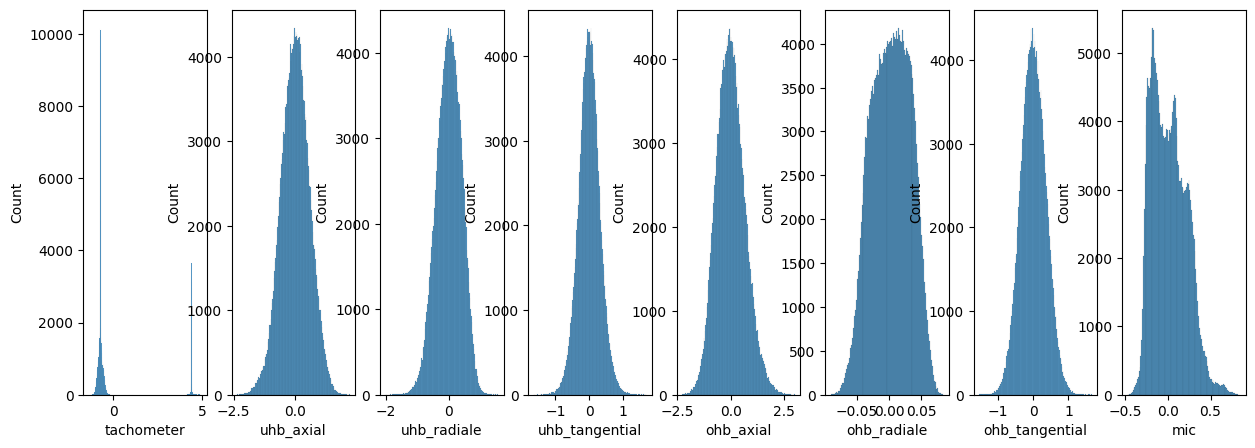

In [ ]:
import seaborn as sns

print("Dataset Desalinhamento Horizontal 0.5 mm")

fig, axes = plt.subplots(1,8, figsize = (15,5))

sns.histplot(data=dsHMis05, x="tachometer", ax = axes[0])
sns.histplot(data=dsHMis05, x="uhb_axial", ax = axes[1])
sns.histplot(data=dsHMis05, x="uhb_radiale", ax = axes[2])
sns.histplot(data=dsHMis05, x="uhb_tangential", ax = axes[3])
sns.histplot(data=dsHMis05, x="ohb_axial", ax = axes[4])
sns.histplot(data=dsHMis05, x="ohb_radiale", ax = axes[5])
sns.histplot(data=dsHMis05, x="ohb_tangential", ax = axes[6])
sns.histplot(data=dsHMis05, x="mic", ax = axes[7])

plt.show()

Dataset Desalinhamento Horizontal 1.0 mm


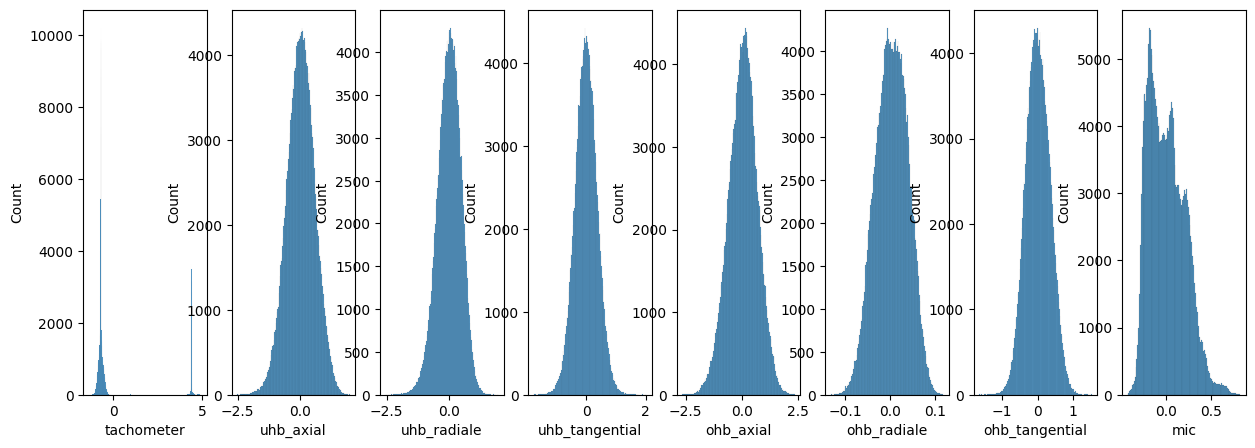

In [ ]:
import seaborn as sns

print("Dataset Desalinhamento Horizontal 1.0 mm")

fig, axes = plt.subplots(1,8, figsize = (15,5))

sns.histplot(data=dsHMis10, x="tachometer", ax = axes[0])
sns.histplot(data=dsHMis10, x="uhb_axial", ax = axes[1])
sns.histplot(data=dsHMis10, x="uhb_radiale", ax = axes[2])
sns.histplot(data=dsHMis10, x="uhb_tangential", ax = axes[3])
sns.histplot(data=dsHMis10, x="ohb_axial", ax = axes[4])
sns.histplot(data=dsHMis10, x="ohb_radiale", ax = axes[5])
sns.histplot(data=dsHMis10, x="ohb_tangential", ax = axes[6])
sns.histplot(data=dsHMis10, x="mic", ax = axes[7])

plt.show()

Dataset Desalinhamento Vertical 0.51 mm


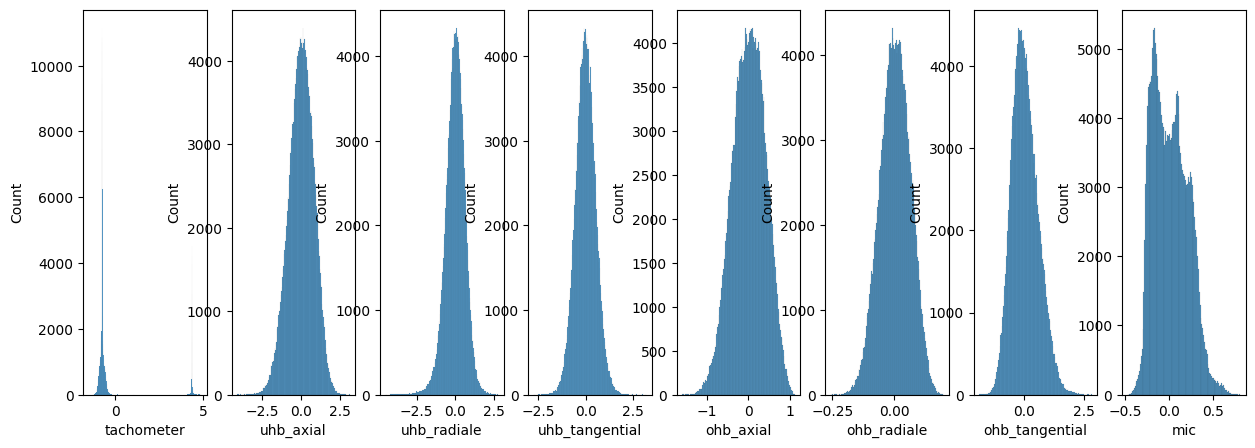

In [ ]:
import seaborn as sns

print("Dataset Desalinhamento Vertical 0.51 mm")

fig, axes = plt.subplots(1,8, figsize = (15,5))

sns.histplot(data=dsVMis51, x="tachometer", ax = axes[0])
sns.histplot(data=dsVMis51, x="uhb_axial", ax = axes[1])
sns.histplot(data=dsVMis51, x="uhb_radiale", ax = axes[2])
sns.histplot(data=dsVMis51, x="uhb_tangential", ax = axes[3])
sns.histplot(data=dsVMis51, x="ohb_axial", ax = axes[4])
sns.histplot(data=dsVMis51, x="ohb_radiale", ax = axes[5])
sns.histplot(data=dsVMis51, x="ohb_tangential", ax = axes[6])
sns.histplot(data=dsVMis51, x="mic", ax = axes[7])

plt.show()

Dataset Desalinhamento Vertical 1.27 mm


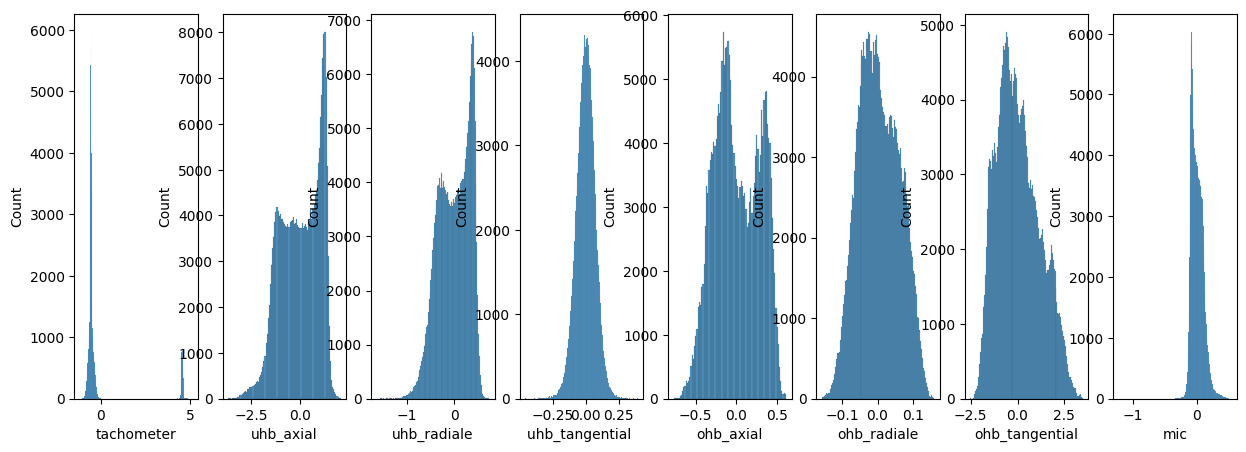

In [ ]:
import seaborn as sns

print("Dataset Desalinhamento Vertical 1.27 mm")

fig, axes = plt.subplots(1,8, figsize = (15,5))

sns.histplot(data=dsVMis10, x="tachometer", ax = axes[0])
sns.histplot(data=dsVMis10, x="uhb_axial", ax = axes[1])
sns.histplot(data=dsVMis10, x="uhb_radiale", ax = axes[2])
sns.histplot(data=dsVMis10, x="uhb_tangential", ax = axes[3])
sns.histplot(data=dsVMis10, x="ohb_axial", ax = axes[4])
sns.histplot(data=dsVMis10, x="ohb_radiale", ax = axes[5])
sns.histplot(data=dsVMis10, x="ohb_tangential", ax = axes[6])
sns.histplot(data=dsVMis10, x="mic", ax = axes[7])

plt.show()

O pairplot a seguir permite a avaliação de relação entre as características disponíveis no *dataset*.

A seguir, tem-se os box-plots para cada *feature* para obtenção do 5-number-summary (menor valor de dados, no primeiro quartil,
na mediana, no terceiro quartil e no maior valor de dados) para avaliação do dados. Para a variável **overhang tangetial**, observa-se um destaque maior nas 5 características, colocando as em "regiões" bem definidas.

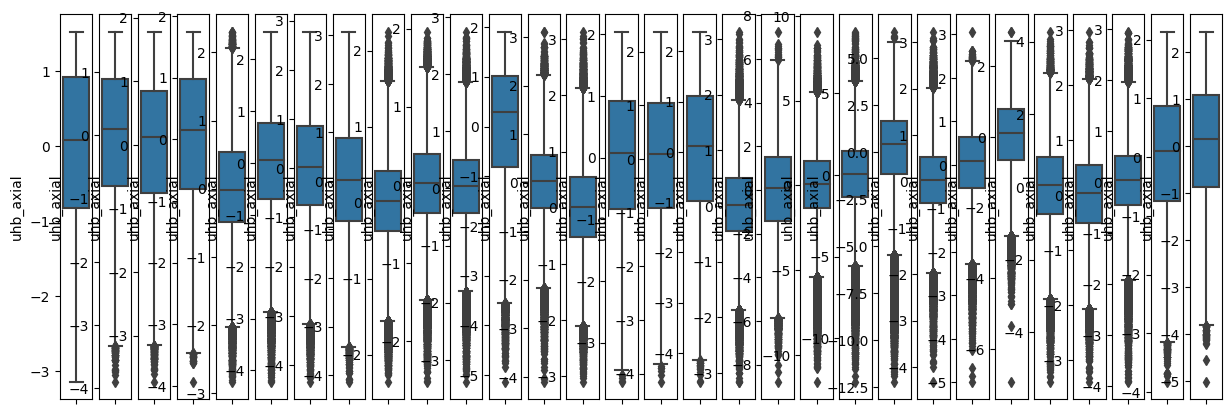

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,30, figsize = (15,5))

sns.boxplot(x=[""]*len(dsNormal), y = 'uhb_axial', data = dsNormal, ax = axes[0])
sns.boxplot(x=[""]*len(dsImb6), y = 'uhb_axial', data = dsImb6, ax = axes[1])
sns.boxplot(x=[""]*len(dsImb10), y = 'uhb_axial', data = dsImb10, ax = axes[2])
sns.boxplot(x=[""]*len(dsImb15), y = 'uhb_axial', data = dsImb15, ax = axes[3])
sns.boxplot(x=[""]*len(dsImb20), y = 'uhb_axial', data = dsImb20, ax = axes[4])
sns.boxplot(x=[""]*len(dsImb25), y = 'uhb_axial', data = dsImb25, ax = axes[5])
sns.boxplot(x=[""]*len(dsImb30), y = 'uhb_axial', data = dsImb30, ax = axes[6])
sns.boxplot(x=[""]*len(dsImb35), y = 'uhb_axial', data = dsImb35, ax = axes[7])
sns.boxplot(x=[""]*len(dsHMis05), y = 'uhb_axial', data = dsHMis05, ax = axes[8])
sns.boxplot(x=[""]*len(dsHMis10), y = 'uhb_axial', data = dsHMis10, ax = axes[9])
sns.boxplot(x=[""]*len(dsHMis15), y = 'uhb_axial', data = dsHMis15, ax = axes[10])
sns.boxplot(x=[""]*len(dsHMis20), y = 'uhb_axial', data = dsHMis20, ax = axes[11])
sns.boxplot(x=[""]*len(dsVMis51), y = 'uhb_axial', data = dsVMis51, ax = axes[12])
sns.boxplot(x=[""]*len(dsVMis63), y = 'uhb_axial', data = dsVMis63, ax = axes[13])
sns.boxplot(x=[""]*len(dsVMis127), y = 'uhb_axial', data = dsVMis127, ax = axes[14])
sns.boxplot(x=[""]*len(dsVMis140), y = 'uhb_axial', data = dsVMis140, ax = axes[15])
sns.boxplot(x=[""]*len(dsVMis178), y = 'uhb_axial', data = dsVMis178, ax = axes[16])
sns.boxplot(x=[""]*len(dsVMis190), y = 'uhb_axial', data = dsVMis190, ax = axes[17])
sns.boxplot(x=[""]*len(dsBF0), y = 'uhb_axial', data = dsBF0, ax = axes[18])
sns.boxplot(x=[""]*len(dsBF6), y = 'uhb_axial', data = dsBF6, ax = axes[19])
sns.boxplot(x=[""]*len(dsBF20), y = 'uhb_axial', data = dsBF20, ax = axes[20])
sns.boxplot(x=[""]*len(dsBF35), y = 'uhb_axial', data = dsBF35, ax = axes[21])
sns.boxplot(x=[""]*len(dsCF0), y = 'uhb_axial', data = dsCF0, ax = axes[22])
sns.boxplot(x=[""]*len(dsCF6), y = 'uhb_axial', data = dsCF6, ax = axes[23])
sns.boxplot(x=[""]*len(dsCF20), y = 'uhb_axial', data = dsCF20, ax = axes[24])
sns.boxplot(x=[""]*len(dsCF35), y = 'uhb_axial', data = dsCF35, ax = axes[25])
sns.boxplot(x=[""]*len(dsOF0), y = 'uhb_axial', data = dsOF0, ax = axes[26])
sns.boxplot(x=[""]*len(dsOF6), y = 'uhb_axial', data = dsOF6, ax = axes[27])
sns.boxplot(x=[""]*len(dsOF20), y = 'uhb_axial', data = dsOF20, ax = axes[28])
sns.boxplot(x=[""]*len(dsOF35), y = 'uhb_axial', data = dsOF35, ax = axes[29])

plt.show()

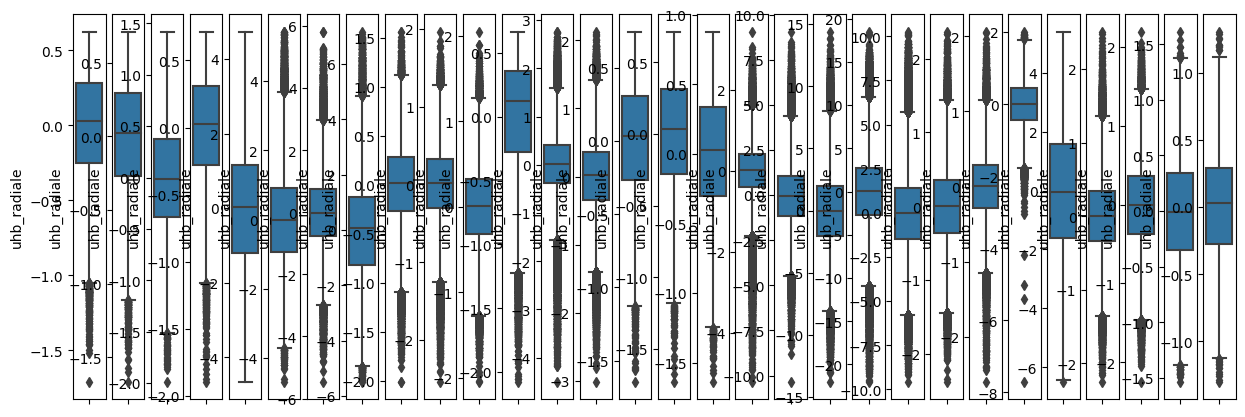

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,30, figsize = (15,5))

sns.boxplot(x=[""]*len(dsNormal), y = 'uhb_radiale', data = dsNormal, ax = axes[0])
sns.boxplot(x=[""]*len(dsImb6), y = 'uhb_radiale', data = dsImb6, ax = axes[1])
sns.boxplot(x=[""]*len(dsImb10), y = 'uhb_radiale', data = dsImb10, ax = axes[2])
sns.boxplot(x=[""]*len(dsImb15), y = 'uhb_radiale', data = dsImb15, ax = axes[3])
sns.boxplot(x=[""]*len(dsImb20), y = 'uhb_radiale', data = dsImb20, ax = axes[4])
sns.boxplot(x=[""]*len(dsImb25), y = 'uhb_radiale', data = dsImb25, ax = axes[5])
sns.boxplot(x=[""]*len(dsImb30), y = 'uhb_radiale', data = dsImb30, ax = axes[6])
sns.boxplot(x=[""]*len(dsImb35), y = 'uhb_radiale', data = dsImb35, ax = axes[7])
sns.boxplot(x=[""]*len(dsHMis05), y = 'uhb_radiale', data = dsHMis05, ax = axes[8])
sns.boxplot(x=[""]*len(dsHMis10), y = 'uhb_radiale', data = dsHMis10, ax = axes[9])
sns.boxplot(x=[""]*len(dsHMis15), y = 'uhb_radiale', data = dsHMis15, ax = axes[10])
sns.boxplot(x=[""]*len(dsHMis20), y = 'uhb_radiale', data = dsHMis20, ax = axes[11])
sns.boxplot(x=[""]*len(dsVMis51), y = 'uhb_radiale', data = dsVMis51, ax = axes[12])
sns.boxplot(x=[""]*len(dsVMis63), y = 'uhb_radiale', data = dsVMis63, ax = axes[13])
sns.boxplot(x=[""]*len(dsVMis127), y = 'uhb_radiale', data = dsVMis127, ax = axes[14])
sns.boxplot(x=[""]*len(dsVMis140), y = 'uhb_radiale', data = dsVMis140, ax = axes[15])
sns.boxplot(x=[""]*len(dsVMis178), y = 'uhb_radiale', data = dsVMis178, ax = axes[16])
sns.boxplot(x=[""]*len(dsVMis190), y = 'uhb_radiale', data = dsVMis190, ax = axes[17])
sns.boxplot(x=[""]*len(dsBF0), y = 'uhb_radiale', data = dsBF0, ax = axes[18])
sns.boxplot(x=[""]*len(dsBF6), y = 'uhb_radiale', data = dsBF6, ax = axes[19])
sns.boxplot(x=[""]*len(dsBF20), y = 'uhb_radiale', data = dsBF20, ax = axes[20])
sns.boxplot(x=[""]*len(dsBF35), y = 'uhb_radiale', data = dsBF35, ax = axes[21])
sns.boxplot(x=[""]*len(dsCF0), y = 'uhb_radiale', data = dsCF0, ax = axes[22])
sns.boxplot(x=[""]*len(dsCF6), y = 'uhb_radiale', data = dsCF6, ax = axes[23])
sns.boxplot(x=[""]*len(dsCF20), y = 'uhb_radiale', data = dsCF20, ax = axes[24])
sns.boxplot(x=[""]*len(dsCF35), y = 'uhb_radiale', data = dsCF35, ax = axes[25])
sns.boxplot(x=[""]*len(dsOF0), y = 'uhb_radiale', data = dsOF0, ax = axes[26])
sns.boxplot(x=[""]*len(dsOF6), y = 'uhb_radiale', data = dsOF6, ax = axes[27])
sns.boxplot(x=[""]*len(dsOF20), y = 'uhb_radiale', data = dsOF20, ax = axes[28])
sns.boxplot(x=[""]*len(dsOF35), y = 'uhb_radiale', data = dsOF35, ax = axes[29])

plt.show()

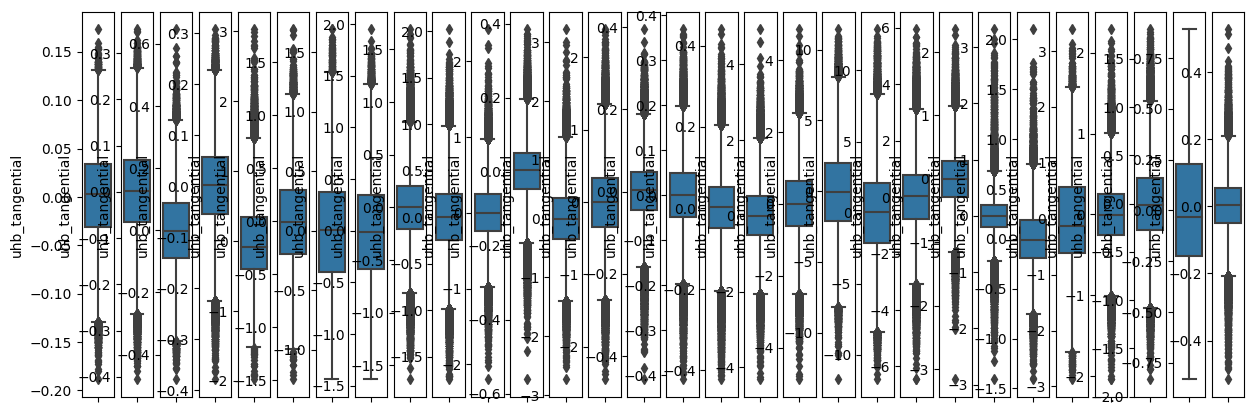

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,30, figsize = (15,5))

sns.boxplot(x=[""]*len(dsNormal), y = 'uhb_tangential', data = dsNormal, ax = axes[0])
sns.boxplot(x=[""]*len(dsImb6), y = 'uhb_tangential', data = dsImb6, ax = axes[1])
sns.boxplot(x=[""]*len(dsImb10), y = 'uhb_tangential', data = dsImb10, ax = axes[2])
sns.boxplot(x=[""]*len(dsImb15), y = 'uhb_tangential', data = dsImb15, ax = axes[3])
sns.boxplot(x=[""]*len(dsImb20), y = 'uhb_tangential', data = dsImb20, ax = axes[4])
sns.boxplot(x=[""]*len(dsImb25), y = 'uhb_tangential', data = dsImb25, ax = axes[5])
sns.boxplot(x=[""]*len(dsImb30), y = 'uhb_tangential', data = dsImb30, ax = axes[6])
sns.boxplot(x=[""]*len(dsImb35), y = 'uhb_tangential', data = dsImb35, ax = axes[7])
sns.boxplot(x=[""]*len(dsHMis05), y = 'uhb_tangential', data = dsHMis05, ax = axes[8])
sns.boxplot(x=[""]*len(dsHMis10), y = 'uhb_tangential', data = dsHMis10, ax = axes[9])
sns.boxplot(x=[""]*len(dsHMis15), y = 'uhb_tangential', data = dsHMis15, ax = axes[10])
sns.boxplot(x=[""]*len(dsHMis20), y = 'uhb_tangential', data = dsHMis20, ax = axes[11])
sns.boxplot(x=[""]*len(dsVMis51), y = 'uhb_tangential', data = dsVMis51, ax = axes[12])
sns.boxplot(x=[""]*len(dsVMis63), y = 'uhb_tangential', data = dsVMis63, ax = axes[13])
sns.boxplot(x=[""]*len(dsVMis127), y = 'uhb_tangential', data = dsVMis127, ax = axes[14])
sns.boxplot(x=[""]*len(dsVMis140), y = 'uhb_tangential', data = dsVMis140, ax = axes[15])
sns.boxplot(x=[""]*len(dsVMis178), y = 'uhb_tangential', data = dsVMis178, ax = axes[16])
sns.boxplot(x=[""]*len(dsVMis190), y = 'uhb_tangential', data = dsVMis190, ax = axes[17])
sns.boxplot(x=[""]*len(dsBF0), y = 'uhb_tangential', data = dsBF0, ax = axes[18])
sns.boxplot(x=[""]*len(dsBF6), y = 'uhb_tangential', data = dsBF6, ax = axes[19])
sns.boxplot(x=[""]*len(dsBF20), y = 'uhb_tangential', data = dsBF20, ax = axes[20])
sns.boxplot(x=[""]*len(dsBF35), y = 'uhb_tangential', data = dsBF35, ax = axes[21])
sns.boxplot(x=[""]*len(dsCF0), y = 'uhb_tangential', data = dsCF0, ax = axes[22])
sns.boxplot(x=[""]*len(dsCF6), y = 'uhb_tangential', data = dsCF6, ax = axes[23])
sns.boxplot(x=[""]*len(dsCF20), y = 'uhb_tangential', data = dsCF20, ax = axes[24])
sns.boxplot(x=[""]*len(dsCF35), y = 'uhb_tangential', data = dsCF35, ax = axes[25])
sns.boxplot(x=[""]*len(dsOF0), y = 'uhb_tangential', data = dsOF0, ax = axes[26])
sns.boxplot(x=[""]*len(dsOF6), y = 'uhb_tangential', data = dsOF6, ax = axes[27])
sns.boxplot(x=[""]*len(dsOF20), y = 'uhb_tangential', data = dsOF20, ax = axes[28])
sns.boxplot(x=[""]*len(dsOF35), y = 'uhb_tangential', data = dsOF35, ax = axes[29])

plt.show()

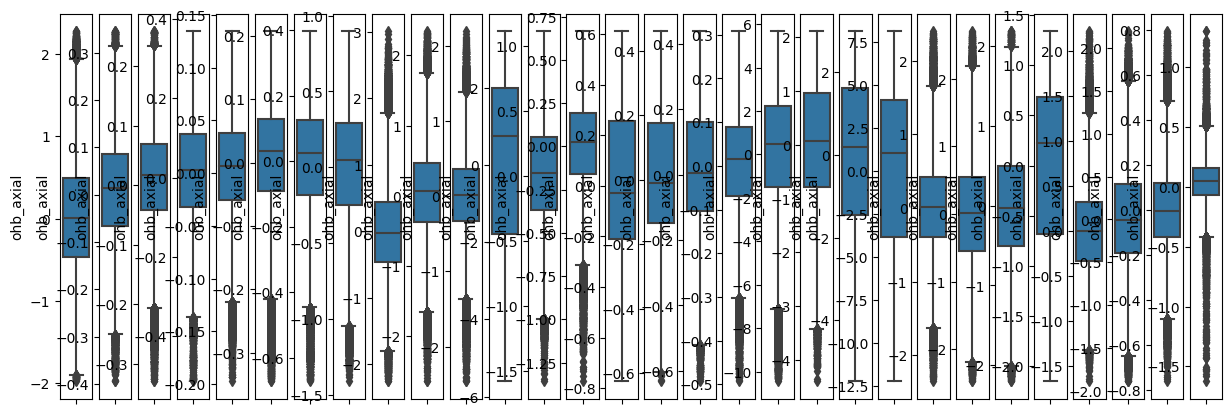

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,30, figsize = (15,5))

sns.boxplot(x=[""]*len(dsNormal), y = 'ohb_axial', data = dsNormal, ax = axes[0])
sns.boxplot(x=[""]*len(dsImb6), y = 'ohb_axial', data = dsImb6, ax = axes[1])
sns.boxplot(x=[""]*len(dsImb10), y = 'ohb_axial', data = dsImb10, ax = axes[2])
sns.boxplot(x=[""]*len(dsImb15), y = 'ohb_axial', data = dsImb15, ax = axes[3])
sns.boxplot(x=[""]*len(dsImb20), y = 'ohb_axial', data = dsImb20, ax = axes[4])
sns.boxplot(x=[""]*len(dsImb25), y = 'ohb_axial', data = dsImb25, ax = axes[5])
sns.boxplot(x=[""]*len(dsImb30), y = 'ohb_axial', data = dsImb30, ax = axes[6])
sns.boxplot(x=[""]*len(dsImb35), y = 'ohb_axial', data = dsImb35, ax = axes[7])
sns.boxplot(x=[""]*len(dsHMis05), y = 'ohb_axial', data = dsHMis05, ax = axes[8])
sns.boxplot(x=[""]*len(dsHMis10), y = 'ohb_axial', data = dsHMis10, ax = axes[9])
sns.boxplot(x=[""]*len(dsHMis15), y = 'ohb_axial', data = dsHMis15, ax = axes[10])
sns.boxplot(x=[""]*len(dsHMis20), y = 'ohb_axial', data = dsHMis20, ax = axes[11])
sns.boxplot(x=[""]*len(dsVMis51), y = 'ohb_axial', data = dsVMis51, ax = axes[12])
sns.boxplot(x=[""]*len(dsVMis63), y = 'ohb_axial', data = dsVMis63, ax = axes[13])
sns.boxplot(x=[""]*len(dsVMis127), y = 'ohb_axial', data = dsVMis127, ax = axes[14])
sns.boxplot(x=[""]*len(dsVMis140), y = 'ohb_axial', data = dsVMis140, ax = axes[15])
sns.boxplot(x=[""]*len(dsVMis178), y = 'ohb_axial', data = dsVMis178, ax = axes[16])
sns.boxplot(x=[""]*len(dsVMis190), y = 'ohb_axial', data = dsVMis190, ax = axes[17])
sns.boxplot(x=[""]*len(dsBF0), y = 'ohb_axial', data = dsBF0, ax = axes[18])
sns.boxplot(x=[""]*len(dsBF6), y = 'ohb_axial', data = dsBF6, ax = axes[19])
sns.boxplot(x=[""]*len(dsBF20), y = 'ohb_axial', data = dsBF20, ax = axes[20])
sns.boxplot(x=[""]*len(dsBF35), y = 'ohb_axial', data = dsBF35, ax = axes[21])
sns.boxplot(x=[""]*len(dsCF0), y = 'ohb_axial', data = dsCF0, ax = axes[22])
sns.boxplot(x=[""]*len(dsCF6), y = 'ohb_axial', data = dsCF6, ax = axes[23])
sns.boxplot(x=[""]*len(dsCF20), y = 'ohb_axial', data = dsCF20, ax = axes[24])
sns.boxplot(x=[""]*len(dsCF35), y = 'ohb_axial', data = dsCF35, ax = axes[25])
sns.boxplot(x=[""]*len(dsOF0), y = 'ohb_axial', data = dsOF0, ax = axes[26])
sns.boxplot(x=[""]*len(dsOF6), y = 'ohb_axial', data = dsOF6, ax = axes[27])
sns.boxplot(x=[""]*len(dsOF20), y = 'ohb_axial', data = dsOF20, ax = axes[28])
sns.boxplot(x=[""]*len(dsOF35), y = 'ohb_axial', data = dsOF35, ax = axes[29])

plt.show()

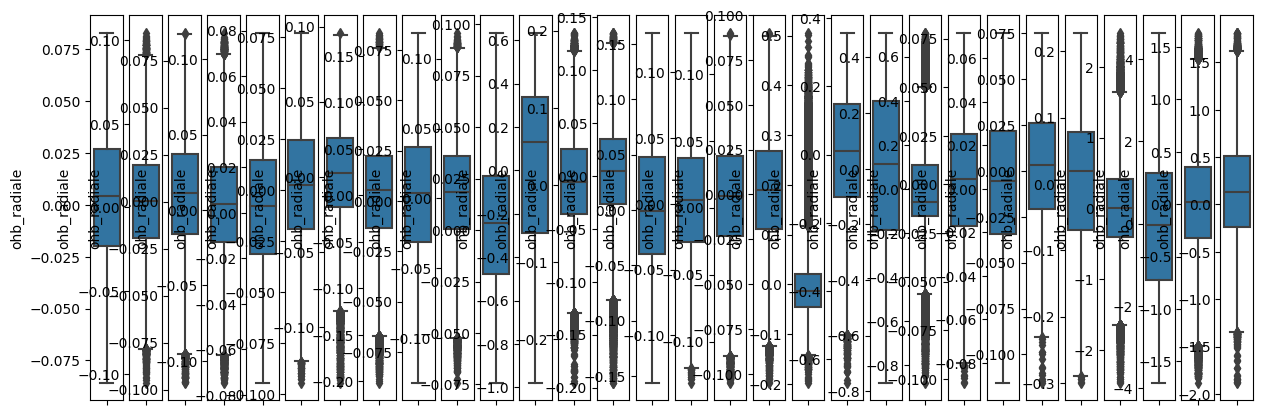

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,30, figsize = (15,5))

sns.boxplot(x=[""]*len(dsNormal), y = 'ohb_radiale', data = dsNormal, ax = axes[0])
sns.boxplot(x=[""]*len(dsImb6), y = 'ohb_radiale', data = dsImb6, ax = axes[1])
sns.boxplot(x=[""]*len(dsImb10), y = 'ohb_radiale', data = dsImb10, ax = axes[2])
sns.boxplot(x=[""]*len(dsImb15), y = 'ohb_radiale', data = dsImb15, ax = axes[3])
sns.boxplot(x=[""]*len(dsImb20), y = 'ohb_radiale', data = dsImb20, ax = axes[4])
sns.boxplot(x=[""]*len(dsImb25), y = 'ohb_radiale', data = dsImb25, ax = axes[5])
sns.boxplot(x=[""]*len(dsImb30), y = 'ohb_radiale', data = dsImb30, ax = axes[6])
sns.boxplot(x=[""]*len(dsImb35), y = 'ohb_radiale', data = dsImb35, ax = axes[7])
sns.boxplot(x=[""]*len(dsHMis05), y = 'ohb_radiale', data = dsHMis05, ax = axes[8])
sns.boxplot(x=[""]*len(dsHMis10), y = 'ohb_radiale', data = dsHMis10, ax = axes[9])
sns.boxplot(x=[""]*len(dsHMis15), y = 'ohb_radiale', data = dsHMis15, ax = axes[10])
sns.boxplot(x=[""]*len(dsHMis20), y = 'ohb_radiale', data = dsHMis20, ax = axes[11])
sns.boxplot(x=[""]*len(dsVMis51), y = 'ohb_radiale', data = dsVMis51, ax = axes[12])
sns.boxplot(x=[""]*len(dsVMis63), y = 'ohb_radiale', data = dsVMis63, ax = axes[13])
sns.boxplot(x=[""]*len(dsVMis127), y = 'ohb_radiale', data = dsVMis127, ax = axes[14])
sns.boxplot(x=[""]*len(dsVMis140), y = 'ohb_radiale', data = dsVMis140, ax = axes[15])
sns.boxplot(x=[""]*len(dsVMis178), y = 'ohb_radiale', data = dsVMis178, ax = axes[16])
sns.boxplot(x=[""]*len(dsVMis190), y = 'ohb_radiale', data = dsVMis190, ax = axes[17])
sns.boxplot(x=[""]*len(dsBF0), y = 'ohb_radiale', data = dsBF0, ax = axes[18])
sns.boxplot(x=[""]*len(dsBF6), y = 'ohb_radiale', data = dsBF6, ax = axes[19])
sns.boxplot(x=[""]*len(dsBF20), y = 'ohb_radiale', data = dsBF20, ax = axes[20])
sns.boxplot(x=[""]*len(dsBF35), y = 'ohb_radiale', data = dsBF35, ax = axes[21])
sns.boxplot(x=[""]*len(dsCF0), y = 'ohb_radiale', data = dsCF0, ax = axes[22])
sns.boxplot(x=[""]*len(dsCF6), y = 'ohb_radiale', data = dsCF6, ax = axes[23])
sns.boxplot(x=[""]*len(dsCF20), y = 'ohb_radiale', data = dsCF20, ax = axes[24])
sns.boxplot(x=[""]*len(dsCF35), y = 'ohb_radiale', data = dsCF35, ax = axes[25])
sns.boxplot(x=[""]*len(dsOF0), y = 'ohb_radiale', data = dsOF0, ax = axes[26])
sns.boxplot(x=[""]*len(dsOF6), y = 'ohb_radiale', data = dsOF6, ax = axes[27])
sns.boxplot(x=[""]*len(dsOF20), y = 'ohb_radiale', data = dsOF20, ax = axes[28])
sns.boxplot(x=[""]*len(dsOF35), y = 'ohb_radiale', data = dsOF35, ax = axes[29])

plt.show()

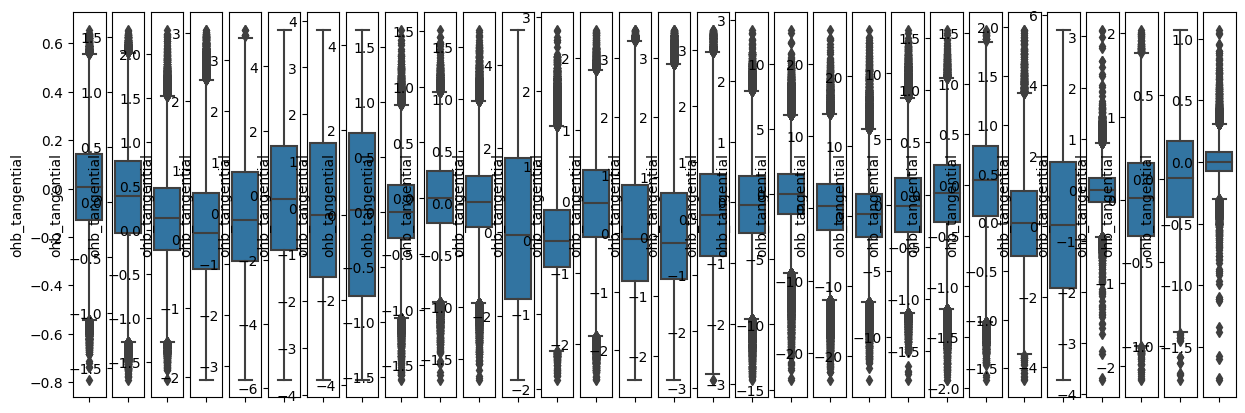

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,30, figsize = (15,5))

sns.boxplot(x=[""]*len(dsNormal), y = 'ohb_tangential', data = dsNormal, ax = axes[0])
sns.boxplot(x=[""]*len(dsImb6), y = 'ohb_tangential', data = dsImb6, ax = axes[1])
sns.boxplot(x=[""]*len(dsImb10), y = 'ohb_tangential', data = dsImb10, ax = axes[2])
sns.boxplot(x=[""]*len(dsImb15), y = 'ohb_tangential', data = dsImb15, ax = axes[3])
sns.boxplot(x=[""]*len(dsImb20), y = 'ohb_tangential', data = dsImb20, ax = axes[4])
sns.boxplot(x=[""]*len(dsImb25), y = 'ohb_tangential', data = dsImb25, ax = axes[5])
sns.boxplot(x=[""]*len(dsImb30), y = 'ohb_tangential', data = dsImb30, ax = axes[6])
sns.boxplot(x=[""]*len(dsImb35), y = 'ohb_tangential', data = dsImb35, ax = axes[7])
sns.boxplot(x=[""]*len(dsHMis05), y = 'ohb_tangential', data = dsHMis05, ax = axes[8])
sns.boxplot(x=[""]*len(dsHMis10), y = 'ohb_tangential', data = dsHMis10, ax = axes[9])
sns.boxplot(x=[""]*len(dsHMis15), y = 'ohb_tangential', data = dsHMis15, ax = axes[10])
sns.boxplot(x=[""]*len(dsHMis20), y = 'ohb_tangential', data = dsHMis20, ax = axes[11])
sns.boxplot(x=[""]*len(dsVMis51), y = 'ohb_tangential', data = dsVMis51, ax = axes[12])
sns.boxplot(x=[""]*len(dsVMis63), y = 'ohb_tangential', data = dsVMis63, ax = axes[13])
sns.boxplot(x=[""]*len(dsVMis127), y = 'ohb_tangential', data = dsVMis127, ax = axes[14])
sns.boxplot(x=[""]*len(dsVMis140), y = 'ohb_tangential', data = dsVMis140, ax = axes[15])
sns.boxplot(x=[""]*len(dsVMis178), y = 'ohb_tangential', data = dsVMis178, ax = axes[16])
sns.boxplot(x=[""]*len(dsVMis190), y = 'ohb_tangential', data = dsVMis190, ax = axes[17])
sns.boxplot(x=[""]*len(dsBF0), y = 'ohb_tangential', data = dsBF0, ax = axes[18])
sns.boxplot(x=[""]*len(dsBF6), y = 'ohb_tangential', data = dsBF6, ax = axes[19])
sns.boxplot(x=[""]*len(dsBF20), y = 'ohb_tangential', data = dsBF20, ax = axes[20])
sns.boxplot(x=[""]*len(dsBF35), y = 'ohb_tangential', data = dsBF35, ax = axes[21])
sns.boxplot(x=[""]*len(dsCF0), y = 'ohb_tangential', data = dsCF0, ax = axes[22])
sns.boxplot(x=[""]*len(dsCF6), y = 'ohb_tangential', data = dsCF6, ax = axes[23])
sns.boxplot(x=[""]*len(dsCF20), y = 'ohb_tangential', data = dsCF20, ax = axes[24])
sns.boxplot(x=[""]*len(dsCF35), y = 'ohb_tangential', data = dsCF35, ax = axes[25])
sns.boxplot(x=[""]*len(dsOF0), y = 'ohb_tangential', data = dsOF0, ax = axes[26])
sns.boxplot(x=[""]*len(dsOF6), y = 'ohb_tangential', data = dsOF6, ax = axes[27])
sns.boxplot(x=[""]*len(dsOF20), y = 'ohb_tangential', data = dsOF20, ax = axes[28])
sns.boxplot(x=[""]*len(dsOF35), y = 'ohb_tangential', data = dsOF35, ax = axes[29])

plt.show()

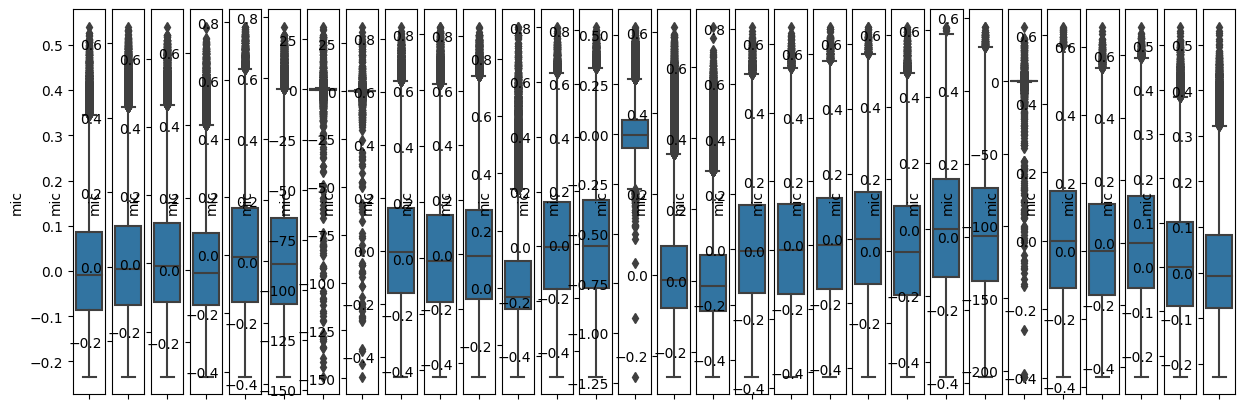

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,30, figsize = (15,5))

sns.boxplot(x=[""]*len(dsNormal), y = 'mic', data = dsNormal, ax = axes[0])
sns.boxplot(x=[""]*len(dsImb6), y = 'mic', data = dsImb6, ax = axes[1])
sns.boxplot(x=[""]*len(dsImb10), y = 'mic', data = dsImb10, ax = axes[2])
sns.boxplot(x=[""]*len(dsImb15), y = 'mic', data = dsImb15, ax = axes[3])
sns.boxplot(x=[""]*len(dsImb20), y = 'mic', data = dsImb20, ax = axes[4])
sns.boxplot(x=[""]*len(dsImb25), y = 'mic', data = dsImb25, ax = axes[5])
sns.boxplot(x=[""]*len(dsImb30), y = 'mic', data = dsImb30, ax = axes[6])
sns.boxplot(x=[""]*len(dsImb35), y = 'mic', data = dsImb35, ax = axes[7])
sns.boxplot(x=[""]*len(dsHMis05), y = 'mic', data = dsHMis05, ax = axes[8])
sns.boxplot(x=[""]*len(dsHMis10), y = 'mic', data = dsHMis10, ax = axes[9])
sns.boxplot(x=[""]*len(dsHMis15), y = 'mic', data = dsHMis15, ax = axes[10])
sns.boxplot(x=[""]*len(dsHMis20), y = 'mic', data = dsHMis20, ax = axes[11])
sns.boxplot(x=[""]*len(dsVMis51), y = 'mic', data = dsVMis51, ax = axes[12])
sns.boxplot(x=[""]*len(dsVMis63), y = 'mic', data = dsVMis63, ax = axes[13])
sns.boxplot(x=[""]*len(dsVMis127), y = 'mic', data = dsVMis127, ax = axes[14])
sns.boxplot(x=[""]*len(dsVMis140), y = 'mic', data = dsVMis140, ax = axes[15])
sns.boxplot(x=[""]*len(dsVMis178), y = 'mic', data = dsVMis178, ax = axes[16])
sns.boxplot(x=[""]*len(dsVMis190), y = 'mic', data = dsVMis190, ax = axes[17])
sns.boxplot(x=[""]*len(dsBF0), y = 'mic', data = dsBF0, ax = axes[18])
sns.boxplot(x=[""]*len(dsBF6), y = 'mic', data = dsBF6, ax = axes[19])
sns.boxplot(x=[""]*len(dsBF20), y = 'mic', data = dsBF20, ax = axes[20])
sns.boxplot(x=[""]*len(dsBF35), y = 'mic', data = dsBF35, ax = axes[21])
sns.boxplot(x=[""]*len(dsCF0), y = 'mic', data = dsCF0, ax = axes[22])
sns.boxplot(x=[""]*len(dsCF6), y = 'mic', data = dsCF6, ax = axes[23])
sns.boxplot(x=[""]*len(dsCF20), y = 'mic', data = dsCF20, ax = axes[24])
sns.boxplot(x=[""]*len(dsCF35), y = 'mic', data = dsCF35, ax = axes[25])
sns.boxplot(x=[""]*len(dsOF0), y = 'mic', data = dsOF0, ax = axes[26])
sns.boxplot(x=[""]*len(dsOF6), y = 'mic', data = dsOF6, ax = axes[27])
sns.boxplot(x=[""]*len(dsOF20), y = 'mic', data = dsOF20, ax = axes[28])
sns.boxplot(x=[""]*len(dsOF35), y = 'mic', data = dsOF35, ax = axes[29])

plt.show()

Pode-se verificar que a distribuição da variável **overhang tangential** é diferente para as três classe (0 sem falha, 1 desbalanceamento e 2 desalinhamento). Pode-se afirmar que provavelmente ela será útil para a classificação das falhas.

Para as outras variáveis, em especial *microphone* e *underhang axial*, percebe-se que as informações são muito semelhantes para as três categorias, sendo assim, seu uso não irá influenciar para a classificação das falhas.

# Limpeza dos dados

Para o dataset em questão, algumas técnicas de limpeza já foram realizadas, portanto não há dados faltantes, nulos, errados, ou duplicados para todas as categorias.

Entretanto, os dados de vibração possuem mais instâncias do que variáveis, e dessa forma, uma redução de dimensionalidade e seleção de features são necessárias.

In [ ]:
# Verifica se o dataset possui nulo.
dsNormal.isnull().count()

tachometer         250000
uhb_axial          250000
uhb_radiale        250000
uhb_tangential     250000
ohb_axial          250000
ohb_radiale        250000
ohb_tangential     250000
mic                250000
dtype: int64

In [ ]:
dsImb6.isnull().count()

tachometer         250000
uhb_axial          250000
uhb_radiale        250000
uhb_tangential     250000
ohb_axial          250000
ohb_radiale        250000
ohb_tangential     250000
mic                250000
dtype: int64

In [ ]:
dsImb15.isnull().count()

tachometer         250000
uhb_axial          250000
uhb_radiale        250000
uhb_tangential     250000
ohb_axial          250000
ohb_radiale        250000
ohb_tangential     250000
mic                250000
dtype: int64

In [ ]:
dsHMis05.isnull().count()

tachometer         250000
uhb_axial          250000
uhb_radiale        250000
uhb_tangential     250000
ohb_axial          250000
ohb_radiale        250000
ohb_tangential     250000
mic                250000
dtype: int64

In [ ]:
dsHMis10.isnull().count()

tachometer         250000
uhb_axial          250000
uhb_radiale        250000
uhb_tangential     250000
ohb_axial          250000
ohb_radiale        250000
ohb_tangential     250000
mic                250000
dtype: int64

In [ ]:
dsVMis05.isnull().count()

tachometer         250000
uhb_axial          250000
uhb_radiale        250000
uhb_tangential     250000
ohb_axial          250000
ohb_radiale        250000
ohb_tangential     250000
mic                250000
dtype: int64

In [ ]:
dsVMis10.isnull().count()

tachometer         250000
uhb_axial          250000
uhb_radiale        250000
uhb_tangential     250000
ohb_axial          250000
ohb_radiale        250000
ohb_tangential     250000
mic                250000
dtype: int64

In [ ]:
# Verifica se o dataset tem dados faltantes.
dsNormal.isna().sum()

tachometer         0
uhb_axial          0
uhb_radiale        0
uhb_tangential     0
ohb_axial          0
ohb_radiale        0
ohb_tangential     0
mic                0
dtype: int64

In [ ]:
dsImb6.isna().sum()

tachometer         0
uhb_axial          0
uhb_radiale        0
uhb_tangential     0
ohb_axial          0
ohb_radiale        0
ohb_tangential     0
mic                0
dtype: int64

In [ ]:
dsImb15.isna().sum()

tachometer         0
uhb_axial          0
uhb_radiale        0
uhb_tangential     0
ohb_axial          0
ohb_radiale        0
ohb_tangential     0
mic                0
dtype: int64

In [ ]:
dsHMis05.isna().sum()

tachometer         0
uhb_axial          0
uhb_radiale        0
uhb_tangential     0
ohb_axial          0
ohb_radiale        0
ohb_tangential     0
mic                0
dtype: int64

In [ ]:
dsHMis10.isna().sum()

tachometer         0
uhb_axial          0
uhb_radiale        0
uhb_tangential     0
ohb_axial          0
ohb_radiale        0
ohb_tangential     0
mic                0
dtype: int64

In [ ]:
dsVMis05.isna().sum()

tachometer         0
uhb_axial          0
uhb_radiale        0
uhb_tangential     0
ohb_axial          0
ohb_radiale        0
ohb_tangential     0
mic                0
dtype: int64

In [ ]:
dsVMis10.isna().sum()

tachometer         0
uhb_axial          0
uhb_radiale        0
uhb_tangential     0
ohb_axial          0
ohb_radiale        0
ohb_tangential     0
mic                0
dtype: int64

# Extração de Features estatísticas dos dados
Esta etapa extrai features comuns a detecção de falhar e monta um modelo para aprendizado de máquina (.csv) com a estrutura *input varibales - output variable*

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

# Define uma função para extrair as features do csv.
def extract_features_from_csv(file_path, target):
  row_of_features = []
  # Load the CSV file into a DataFrame
  df = pd.read_csv(file_path)
  for column in df.columns:
    if (column == 'tachometer'):
      continue
    # Extract features from each column
    feature_1 = df[column].mean()
    feature_2 = df[column].median()
    feature_3 = df[column].std()
    feature_4 = df[column].max()
    feature_5 = df[column].min()
    feature_6 = skew(df[column])
    feature_7 = kurtosis(df[column])
    print([feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7])
    row_of_features = row_of_features + [feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7]

  row_of_features.append(target)
  return row_of_features

In [ ]:
# Classes
# 0 - Normal
# 1 - Imbalance
# 2 - Parallel Vertical Misalignment
# 3 - Parallel Horizontal Misalignment
# 4 - Ball Failure (Bearing Failure)
# 5 - Cage Failure (Bearing Failure)
# 6 - Outter Failure (Bearing Failure)

# Lista para armazenas as features extraídas.
features_list = []

# Itera nos arquivos normais
for filename in os.listdir(dirNormal):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirNormal, filename)
        features = extract_features_from_csv(file_path, 0)
        features_list.append(features)

# Itera nos arquivos com desbalanceamento
for filename in os.listdir(dirImb6):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirImb6, filename)
        features = extract_features_from_csv(file_path, 1)
        features_list.append(features)

# Itera nos arquivos com desbalanceamento
#for filename in os.listdir(dirImb10):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirImb10, filename)
#        features = extract_features_from_csv(file_path, 1)
#        features_list.append(features)

# Itera nos arquivos com desbalanceamento
#for filename in os.listdir(dirImb15):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirImb15, filename)
#        features = extract_features_from_csv(file_path, 1)
#        features_list.append(features)

# Itera nos arquivos com desbalanceamento
for filename in os.listdir(dirImb20):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirImb20, filename)
        features = extract_features_from_csv(file_path, 1)
        features_list.append(features)

# Itera nos arquivos com desbalanceamento
#for filename in os.listdir(dirImb25):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirImb25, filename)
#        features = extract_features_from_csv(file_path, 1)
#        features_list.append(features)

# Itera nos arquivos com desbalanceamento
#for filename in os.listdir(dirImb30):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirImb30, filename)
#        features = extract_features_from_csv(file_path, 1)
#        features_list.append(features)

# Itera nos arquivos com desbalanceamento
for filename in os.listdir(dirImb35):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirImb35, filename)
        features = extract_features_from_csv(file_path, 1)
        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
#for filename in os.listdir(dirVMis51):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirVMis51, filename)
#        features = extract_features_from_csv(file_path, 2)
#        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
#for filename in os.listdir(dirVMis063):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirVMis063, filename)
#        features = extract_features_from_csv(file_path, 2)
#        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
for filename in os.listdir(dirVMis127):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirVMis127, filename)
        features = extract_features_from_csv(file_path, 2)
        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
#for filename in os.listdir(dirVMis140):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirVMis140, filename)
#        features = extract_features_from_csv(file_path, 2)
#        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
#for filename in os.listdir(dirVMis178):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirVMis178, filename)
#        features = extract_features_from_csv(file_path, 2)
#        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
for filename in os.listdir(dirVMis190):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirVMis190, filename)
        features = extract_features_from_csv(file_path, 2)
        features_list.append(features)

# Itera nos arquivos desalinhamento horizontal
#for filename in os.listdir(dirHMis05):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirHMis05, filename)
#        features = extract_features_from_csv(file_path, 3)
#        features_list.append(features)

# Itera nos arquivos desalinhamento horizontal
#for filename in os.listdir(dirHMis10):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirHMis10, filename)
#        features = extract_features_from_csv(file_path, 3)
#        features_list.append(features)

# Itera nos arquivos desalinhamento horizontal
for filename in os.listdir(dirHMis15):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirHMis15, filename)
        features = extract_features_from_csv(file_path, 3)
        features_list.append(features)

# Itera nos arquivos desalinhamento horizontal
#for filename in os.listdir(dirHMis20):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirHMis20, filename)
#        features = extract_features_from_csv(file_path, 3)
#        features_list.append(features)

# Novo

# 4 - Ball Failure (Bearing Failure)
# 5 - Cage Failure (Bearing Failure)
# 6 - Outter Failure (Bearing Failure)

# Itera nos arquivos ball failure
for filename in os.listdir(dirBF0):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirBF0, filename)
        features = extract_features_from_csv(file_path, 4)
        features_list.append(features)

# Itera nos arquivos ball failure
for filename in os.listdir(dirBF6):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirBF6, filename)
        features = extract_features_from_csv(file_path, 4)
        features_list.append(features)

# Itera nos arquivos ball failure
#for filename in os.listdir(dirBF20):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirBF20, filename)
#        features = extract_features_from_csv(file_path, 4)
#        features_list.append(features)

# Itera nos arquivos ball failure
for filename in os.listdir(dirBF35):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirBF35, filename)
        features = extract_features_from_csv(file_path, 4)
        features_list.append(features)


# Itera nos arquivos cage failure
#for filename in os.listdir(dirCF0):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirCF0, filename)
#        features = extract_features_from_csv(file_path, 5)
#        features_list.append(features)

# Itera nos arquivos cage failure
#for filename in os.listdir(dirCF6):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirCF6, filename)
#        features = extract_features_from_csv(file_path, 5)
#        features_list.append(features)

# Itera nos arquivos cage failure
for filename in os.listdir(dirCF20):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirCF20, filename)
        features = extract_features_from_csv(file_path, 5)
        features_list.append(features)

# Itera nos arquivos cage failure
for filename in os.listdir(dirCF35):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirCF35, filename)
        features = extract_features_from_csv(file_path, 5)
        features_list.append(features)

# Itera nos arquivos outter failure
#for filename in os.listdir(dirOF0):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirOF0, filename)
#        features = extract_features_from_csv(file_path, 6)
#        features_list.append(features)

# Itera nos arquivos outter failure
#for filename in os.listdir(dirOF6):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirOF6, filename)
#        features = extract_features_from_csv(file_path, 6)
#        features_list.append(features)

# Itera nos arquivos outter failure
for filename in os.listdir(dirOF20):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirOF20, filename)
        features = extract_features_from_csv(file_path, 6)
        features_list.append(features)

# Itera nos arquivos outter failure
#for filename in os.listdir(dirOF35):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirOF35, filename)
#        features = extract_features_from_csv(file_path, 6)
#        features_list.append(features)

columns = ['uhb_axial_mean', 'uhb_axial_median', 'uhb_axial_std', 'uhb_axial_max', 'uhb_axial_min', 'uhb_axial_skew',
'uhb_axial_kurtosis', 'uhb_radiale_mean', 'uhb_radiale_median', 'uhb_radiale_std', 'uhb_radiale_max', 'uhb_radiale_min',
'uhb_radiale_skew', 'uhb_radiale_kurtosis', 'uhb_tangential_mean', 'uhb_tangential_median', 'uhb_tangential_std',
'uhb_tangential_max', 'uhb_tangential_min', 'uhb_tangential_skew', 'uhb_tangential_kurtosis', 'ohb_axial_mean',
'ohb_axial_median', 'ohb_axial_std', 'ohb_axial_max', 'ohb_axial_min', 'ohb_axial_skew', 'ohb_axial_kurtosis',
'ohb_radiale_mean', 'ohb_radiale_median', 'ohb_radiale_std', 'ohb_radiale_max', 'ohb_radiale_min', 'ohb_radiale_skew',
'ohb_radiale_kurtosis', 'ohb_tangential_mean', 'ohb_tangential_median', 'ohb_tangential_std', 'ohb_tangential_max',
'ohb_tangential_min', 'ohb_tangential_skew', 'ohb_tangential_kurtosis', 'mic_mean', 'mic_median', 'mic_std', 'mic_max',
'mic_min', 'mic_skew', 'mic_kurtosis', 'class']

features_df = pd.DataFrame(features_list, columns=columns)

# Save the features DataFrame to a new CSV file
output_csv_path = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/test_statistics_features.csv'
features_df.to_csv(output_csv_path, index=False)



# Extração de Features com pyAudioAnalysis

Como foi possivel visualizar anteriormente, os dados de vibração são puros, portanto algumas features podem ser extraídas destes para auxiliar o processo de classificação. Para isso, a biblioteca chama pyAudioAnalysis será utilizada no processo, uma vez que, embora seja voltada para áudio, esta fornece

In [ ]:
!pip install pyAudioAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264372 sha256=abb62b4579f08b42ecc070f2bd5ca7a8576674aa7a7346d8e39fd58d29143b57
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyAudioAnalysis


In [ ]:
from pyAudioAnalysis import ShortTermFeatures
import numpy as np

# Define uma função para extrair as features do csv.
def extract_audio_features_from_csv(file_path, target):
  row_of_features = []

  # Load the CSV file into a DataFrame
  df = pd.read_csv(file_path)
  for column in df.columns:
    if (column == 'tachometer'):
      continue
    # Extract features from each column
    Fs = 50000
    size = len(df[column])
    F, f_names = ShortTermFeatures.feature_extraction(df[column], Fs, size, size)
    print(F.flatten().tolist())
    row_of_features = row_of_features + F.flatten().tolist()

  row_of_features.append(target)
  return row_of_features

In [ ]:
# Classes
# 0 - Normal
# 1 - Imbalance
# 2 - Parallel Vertical Misalignment
# 3 - Parallel Horizontal Misalignment
# 4 - Ball Failure (Bearing Failure)
# 5 - Cage Failure (Bearing Failure)
# 6 - Outter Failure (Bearing Failure)

# Lista para armazenas as features extraídas.
features_list = []

# Itera nos arquivos normais
for filename in os.listdir(dirNormal):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirNormal, filename)
        features = extract_audio_features_from_csv(file_path, 0)
        features_list.append(features)

# Itera nos arquivos com desbalanceamento
for filename in os.listdir(dirImb6):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirImb6, filename)
        features = extract_audio_features_from_csv(file_path, 1)
        features_list.append(features)

# Itera nos arquivos com desbalanceamento
#for filename in os.listdir(dirImb10):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirImb10, filename)
#        features = extract_audio_features_from_csv(file_path, 1)
#        features_list.append(features)

# Itera nos arquivos com desbalanceamento
#for filename in os.listdir(dirImb15):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirImb15, filename)
#        features = extract_audio_features_from_csv(file_path, 1)
#        features_list.append(features)

# Itera nos arquivos com desbalanceamento
for filename in os.listdir(dirImb20):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirImb20, filename)
        features = extract_audio_features_from_csv(file_path, 1)
        features_list.append(features)

# Itera nos arquivos com desbalanceamento
#for filename in os.listdir(dirImb25):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirImb25, filename)
#        features = extract_audio_features_from_csv(file_path, 1)
#        features_list.append(features)

# Itera nos arquivos com desbalanceamento
#for filename in os.listdir(dirImb30):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirImb30, filename)
#        features = extract_audio_features_from_csv(file_path, 1)
#        features_list.append(features)

# Itera nos arquivos com desbalanceamento
for filename in os.listdir(dirImb35):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirImb35, filename)
        features = extract_audio_features_from_csv(file_path, 1)
        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
#for filename in os.listdir(dirVMis51):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirVMis51, filename)
#        features = extract_audio_features_from_csv(file_path, 2)
#        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
#for filename in os.listdir(dirVMis063):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirVMis063, filename)
#        features = extract_audio_features_from_csv(file_path, 2)
#        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
for filename in os.listdir(dirVMis127):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirVMis127, filename)
        features = extract_audio_features_from_csv(file_path, 2)
        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
#for filename in os.listdir(dirVMis140):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirVMis140, filename)
#        features = extract_audio_features_from_csv(file_path, 2)
#        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
#for filename in os.listdir(dirVMis178):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirVMis178, filename)
#        features = extract_audio_features_from_csv(file_path, 2)
#        features_list.append(features)

# Itera nos arquivos desalinhamento vertical
for filename in os.listdir(dirVMis190):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirVMis190, filename)
        features = extract_audio_features_from_csv(file_path, 2)
        features_list.append(features)

# Itera nos arquivos desalinhamento horizontal
#for filename in os.listdir(dirHMis05):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirHMis05, filename)
#        features = extract_audio_features_from_csv(file_path, 3)
#        features_list.append(features)

# Itera nos arquivos desalinhamento horizontal
#for filename in os.listdir(dirHMis10):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirHMis10, filename)
#        features = extract_audio_features_from_csv(file_path, 3)
#        features_list.append(features)

# Itera nos arquivos desalinhamento horizontal
for filename in os.listdir(dirHMis15):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirHMis15, filename)
        features = extract_audio_features_from_csv(file_path, 3)
        features_list.append(features)

# Itera nos arquivos desalinhamento horizontal
#for filename in os.listdir(dirHMis20):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirHMis20, filename)
#        features = extract_audio_features_from_csv(file_path, 3)
#        features_list.append(features)

# Novo

# 4 - Ball Failure (Bearing Failure)
# 5 - Cage Failure (Bearing Failure)
# 6 - Outter Failure (Bearing Failure)

# Itera nos arquivos ball failure
for filename in os.listdir(dirBF0):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirBF0, filename)
        features = extract_audio_features_from_csv(file_path, 4)
        features_list.append(features)

# Itera nos arquivos ball failure
for filename in os.listdir(dirBF6):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirBF6, filename)
        features = extract_audio_features_from_csv(file_path, 4)
        features_list.append(features)

# Itera nos arquivos ball failure
#for filename in os.listdir(dirBF20):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirBF20, filename)
#        features = extract_audio_features_from_csv(file_path, 4)
#        features_list.append(features)

# Itera nos arquivos ball failure
for filename in os.listdir(dirBF35):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirBF35, filename)
        features = extract_audio_features_from_csv(file_path, 4)
        features_list.append(features)


# Itera nos arquivos cage failure
#for filename in os.listdir(dirCF0):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirCF0, filename)
#        features = extract_audio_features_from_csv(file_path, 5)
#        features_list.append(features)

# Itera nos arquivos cage failure
#for filename in os.listdir(dirCF6):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirCF6, filename)
#        features = extract_audio_features_from_csv(file_path, 5)
#        features_list.append(features)

# Itera nos arquivos cage failure
for filename in os.listdir(dirCF20):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirCF20, filename)
        features = extract_audio_features_from_csv(file_path, 5)
        features_list.append(features)

# Itera nos arquivos cage failure
for filename in os.listdir(dirCF35):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirCF35, filename)
        features = extract_audio_features_from_csv(file_path, 5)
        features_list.append(features)

# Itera nos arquivos outter failure
#for filename in os.listdir(dirOF0):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirOF0, filename)
#        features = extract_audio_features_from_csv(file_path, 6)
#        features_list.append(features)

# Itera nos arquivos outter failure
#for filename in os.listdir(dirOF6):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirOF6, filename)
#        features = extract_audio_features_from_csv(file_path, 6)
#        features_list.append(features)

# Itera nos arquivos outter failure
for filename in os.listdir(dirOF20):
    if filename.endswith('.csv'):
        file_path = os.path.join(dirOF20, filename)
        features = extract_audio_features_from_csv(file_path, 6)
        features_list.append(features)

# Itera nos arquivos outter failure
#for filename in os.listdir(dirOF35):
#    if filename.endswith('.csv'):
#        file_path = os.path.join(dirOF35, filename)
#        features = extract_audio_features_from_csv(file_path, 6)
#        features_list.append(features)



[0.7681510726042904, 0.06642695361486503, 3.3217991854366757, 0.4385116804174926, 0.33630842588899545, 0.7882489449440229, 0.0, 0.881208, -19.085160694005214, 1.5186659945268677, 0.35610984992098504, 0.1480936509822279, -0.006448495205746099, 0.012189732164392305, -0.10889599202734589, -0.15114859733375474, 0.005611941352430462, 0.06541886029694215, 0.017741596408072893, -0.10185347927399004, -0.02872556904918399, 6.300554582120543e-06, 4.801206779844307e-06, 1.331836737491251e-05, 0.0002038286250676166, 1.820082927725336e-05, 7.938766532859558e-07, 2.7769041477564296e-06, 5.254567374427511e-06, 1.8862330424230214e-06, 6.815815046583657e-06, 2.522215950324438e-06, 2.051115701909803e-06, 5.4927300978338665e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.8180552722210889, 0.03697257315252211, 3.32187910672743, 0.4114827222001927, 0.3395961585198986, 0.77016090

In [ ]:
columns = ['uhb_axial_zcr', 'uhb_axial_energy', 'uhb_axial_energy_entropy', 'uhb_axial_spectral_centroid',
'uhb_axial_spectral_spread', 'uhb_axial_spectral_entropy', 'uhb_axial_spectral_flux',
'uhb_axial_spectral_rolloff', 'uhb_axial_mfcc_1', 'uhb_axial_mfcc_2', 'uhb_axial_mfcc_3',
'uhb_axial_mfcc_4', 'uhb_axial_mfcc_5', 'uhb_axial_mfcc_6', 'uhb_axial_mfcc_7', 'uhb_axial_mfcc_8',
'uhb_axial_mfcc_9', 'uhb_axial_mfcc_10', 'uhb_axial_mfcc_11', 'uhb_axial_mfcc_12', 'uhb_axial_mfcc_13',
'uhb_axial_chroma_1', 'uhb_axial_chroma_2', 'uhb_axial_chroma_3', 'uhb_axial_chroma_4', 'uhb_axial_chroma_5',
'uhb_axial_chroma_6', 'uhb_axial_chroma_7', 'uhb_axial_chroma_8', 'uhb_axial_chroma_9', 'uhb_axial_chroma_10',
'uhb_axial_chroma_11', 'uhb_axial_chroma_12', 'uhb_axial_chroma_std', 'uhb_axial_delta zcr', 'uhb_axial_delta energy',
'uhb_axial_delta energy_entropy', 'uhb_axial_delta spectral_centroid', 'uhb_axial_delta spectral_spread',
'uhb_axial_delta spectral_entropy', 'uhb_axial_delta spectral_flux', 'uhb_axial_delta spectral_rolloff',
'uhb_axial_delta mfcc_1', 'uhb_axial_delta mfcc_2', 'uhb_axial_delta mfcc_3', 'uhb_axial_delta mfcc_4',
'uhb_axial_delta mfcc_5', 'uhb_axial_delta mfcc_6', 'uhb_axial_delta mfcc_7', 'uhb_axial_delta mfcc_8',
'uhb_axial_delta mfcc_9', 'uhb_axial_delta mfcc_10', 'uhb_axial_delta mfcc_11', 'uhb_axial_delta mfcc_12',
'uhb_axial_delta mfcc_13', 'uhb_axial_delta chroma_1', 'uhb_axial_delta chroma_2', 'uhb_axial_delta chroma_3',
'uhb_axial_delta chroma_4', 'uhb_axial_delta chroma_5', 'uhb_axial_delta chroma_6', 'uhb_axial_delta chroma_7',
'uhb_axial_delta chroma_8', 'uhb_axial_delta chroma_9', 'uhb_axial_delta chroma_10', 'uhb_axial_delta chroma_11',
'uhb_axial_delta chroma_12', 'uhb_axial_delta chroma_std', 'uhb_radiale_zcr', 'uhb_radiale_energy',
'uhb_radiale_energy_entropy', 'uhb_radiale_spectral_centroid',
'uhb_radiale_spectral_spread', 'uhb_radiale_spectral_entropy',
'uhb_radiale_spectral_flux', 'uhb_radiale_spectral_rolloff',
'uhb_radiale_mfcc_1', 'uhb_radiale_mfcc_2', 'uhb_radiale_mfcc_3', 'uhb_radiale_mfcc_4',
'uhb_radiale_mfcc_5', 'uhb_radiale_mfcc_6', 'uhb_radiale_mfcc_7', 'uhb_radiale_mfcc_8', 'uhb_radiale_mfcc_9',
'uhb_radiale_mfcc_10', 'uhb_radiale_mfcc_11', 'uhb_radiale_mfcc_12', 'uhb_radiale_mfcc_13', 'uhb_radiale_chroma_1',
'uhb_radiale_chroma_2', 'uhb_radiale_chroma_3', 'uhb_radiale_chroma_4', 'uhb_radiale_chroma_5', 'uhb_radiale_chroma_6',
'uhb_radiale_chroma_7', 'uhb_radiale_chroma_8', 'uhb_radiale_chroma_9', 'uhb_radiale_chroma_10',
'uhb_radiale_chroma_11', 'uhb_radiale_chroma_12', 'uhb_radiale_chroma_std', 'uhb_radiale_delta zcr',
'uhb_radiale_delta energy', 'uhb_radiale_delta energy_entropy', 'uhb_radiale_delta spectral_centroid',
'uhb_radiale_delta spectral_spread', 'uhb_radiale_delta spectral_entropy', 'uhb_radiale_delta spectral_flux',
'uhb_radiale_delta spectral_rolloff', 'uhb_radiale_delta mfcc_1', 'uhb_radiale_delta mfcc_2',
'uhb_radiale_delta mfcc_3', 'uhb_radiale_delta mfcc_4', 'uhb_radiale_delta mfcc_5','uhb_radiale_delta mfcc_6',
'uhb_radiale_delta mfcc_7','uhb_radiale_delta mfcc_8','uhb_radiale_delta mfcc_9','uhb_radiale_delta mfcc_10',
'uhb_radiale_delta mfcc_11','uhb_radiale_delta mfcc_12','uhb_radiale_delta mfcc_13','uhb_radiale_delta chroma_1',
'uhb_radiale_delta chroma_2','uhb_radiale_delta chroma_3','uhb_radiale_delta chroma_4','uhb_radiale_delta chroma_5',
'uhb_radiale_delta chroma_6','uhb_radiale_delta chroma_7','uhb_radiale_delta chroma_8','uhb_radiale_delta chroma_9',
'uhb_radiale_delta chroma_10','uhb_radiale_delta chroma_11','uhb_radiale_delta chroma_12',
'uhb_radiale_delta chroma_std', 'uhb_tangential_zcr', 'uhb_tangential_energy', 'uhb_tangential_energy_entropy',
'uhb_tangential_spectral_centroid', 'uhb_tangential_spectral_spread','uhb_tangential_spectral_entropy',
'uhb_tangential_spectral_flux', 'uhb_tangential_spectral_rolloff', 'uhb_tangential_mfcc_1',
'uhb_tangential_mfcc_2', 'uhb_tangential_mfcc_3', 'uhb_tangential_mfcc_4', 'uhb_tangential_mfcc_5',
'uhb_tangential_mfcc_6', 'uhb_tangential_mfcc_7', 'uhb_tangential_mfcc_8', 'uhb_tangential_mfcc_9',
'uhb_tangential_mfcc_10', 'uhb_tangential_mfcc_11', 'uhb_tangential_mfcc_12', 'uhb_tangential_mfcc_13',
'uhb_tangential_chroma_1', 'uhb_tangential_chroma_2', 'uhb_tangential_chroma_3', 'uhb_tangential_chroma_4',
'uhb_tangential_chroma_5', 'uhb_tangential_chroma_6', 'uhb_tangential_chroma_7', 'uhb_tangential_chroma_8',
'uhb_tangential_chroma_9', 'uhb_tangential_chroma_10', 'uhb_tangential_chroma_11', 'uhb_tangential_chroma_12',
'uhb_tangential_chroma_std','uhb_tangential_delta zcr',  'uhb_tangential_delta energy', 'uhb_tangential_delta energy_entropy',
'uhb_tangential_delta spectral_centroid', 'uhb_tangential_delta spectral_spread', 'uhb_tangential_delta spectral_entropy',
'uhb_tangential_delta spectral_flux', 'uhb_tangential_delta spectral_rolloff', 'uhb_tangential_delta mfcc_1',
'uhb_tangential_delta mfcc_2', 'uhb_tangential_delta mfcc_3', 'uhb_tangential_delta mfcc_4',
'uhb_tangential_delta mfcc_5', 'uhb_tangential_delta mfcc_6', 'uhb_tangential_delta mfcc_7',
'uhb_tangential_delta mfcc_8', 'uhb_tangential_delta mfcc_9', 'uhb_tangential_delta mfcc_10',
'uhb_tangential_delta mfcc_11', 'uhb_tangential_delta mfcc_12', 'uhb_tangential_delta mfcc_13',
'uhb_tangential_delta chroma_1', 'uhb_tangential_delta chroma_2', 'uhb_tangential_delta chroma_3',
'uhb_tangential_delta chroma_4', 'uhb_tangential_delta chroma_5', 'uhb_tangential_delta chroma_6',
'uhb_tangential_delta chroma_7', 'uhb_tangential_delta chroma_8', 'uhb_tangential_delta chroma_9',
'uhb_tangential_delta chroma_10', 'uhb_tangential_delta chroma_11', 'uhb_tangential_delta chroma_12',
'uhb_tangential_delta chroma_std', 'ohb_axial_zcr', 'ohb_axial_energy', 'ohb_axial_energy_entropy',
'ohb_axial_spectral_centroid', 'ohb_axial_spectral_spread', 'ohb_axial_spectral_entropy', 'ohb_axial_spectral_flux',
'ohb_axial_spectral_rolloff', 'ohb_axial_mfcc_1', 'ohb_axial_mfcc_2', 'ohb_axial_mfcc_3', 'ohb_axial_mfcc_4',
'ohb_axial_mfcc_5', 'ohb_axial_mfcc_6', 'ohb_axial_mfcc_7', 'ohb_axial_mfcc_8', 'ohb_axial_mfcc_9', 'ohb_axial_mfcc_10',
'ohb_axial_mfcc_11', 'ohb_axial_mfcc_12', 'ohb_axial_mfcc_13', 'ohb_axial_chroma_1', 'ohb_axial_chroma_2',
'ohb_axial_chroma_3', 'ohb_axial_chroma_4', 'ohb_axial_chroma_5', 'ohb_axial_chroma_6', 'ohb_axial_chroma_7',
'ohb_axial_chroma_8','ohb_axial_chroma_9', 'ohb_axial_chroma_10', 'ohb_axial_chroma_11', 'ohb_axial_chroma_12',
'ohb_axial_chroma_std', 'ohb_axial_delta zcr', 'ohb_axial_delta energy', 'ohb_axial_delta energy_entropy',
'ohb_axial_delta spectral_centroid', 'ohb_axial_delta spectral_spread', 'ohb_axial_delta spectral_entropy',
'ohb_axial_delta spectral_flux', 'ohb_axial_delta spectral_rolloff', 'ohb_axial_delta mfcc_1', 'ohb_axial_delta mfcc_2',
'ohb_axial_delta mfcc_3', 'ohb_axial_delta mfcc_4', 'ohb_axial_delta mfcc_5', 'ohb_axial_delta mfcc_6',
'ohb_axial_delta mfcc_7', 'ohb_axial_delta mfcc_8', 'ohb_axial_delta mfcc_9', 'ohb_axial_delta mfcc_10',
'ohb_axial_delta mfcc_11', 'ohb_axial_delta mfcc_12', 'ohb_axial_delta mfcc_13', 'ohb_axial_delta chroma_1',
'ohb_axial_delta chroma_2', 'ohb_axial_delta chroma_3', 'ohb_axial_delta chroma_4', 'ohb_axial_delta chroma_5',
'ohb_axial_delta chroma_6', 'ohb_axial_delta chroma_7', 'ohb_axial_delta chroma_8', 'ohb_axial_delta chroma_9',
'ohb_axial_delta chroma_10', 'ohb_axial_delta chroma_11', 'ohb_axial_delta chroma_12', 'ohb_axial_delta chroma_std',
'ohb_radiale_zcr', 'ohb_radiale_energy', 'ohb_radiale_energy_entropy', 'ohb_radiale_spectral_centroid',
'ohb_radiale_spectral_spread', 'ohb_radiale_spectral_entropy', 'ohb_radiale_spectral_flux', 'ohb_radiale_spectral_rolloff',
'ohb_radiale_mfcc_1', 'ohb_radiale_mfcc_2', 'ohb_radiale_mfcc_3', 'ohb_radiale_mfcc_4', 'ohb_radiale_mfcc_5',
'ohb_radiale_mfcc_6', 'ohb_radiale_mfcc_7', 'ohb_radiale_mfcc_8', 'ohb_radiale_mfcc_9', 'ohb_radiale_mfcc_10',
'ohb_radiale_mfcc_11', 'ohb_radiale_mfcc_12', 'ohb_radiale_mfcc_13', 'ohb_radiale_chroma_1', 'ohb_radiale_chroma_2',
'ohb_radiale_chroma_3', 'ohb_radiale_chroma_4', 'ohb_radiale_chroma_5', 'ohb_radiale_chroma_6', 'ohb_radiale_chroma_7',
'ohb_radiale_chroma_8', 'ohb_radiale_chroma_9', 'ohb_radiale_chroma_10', 'ohb_radiale_chroma_11', 'ohb_radiale_chroma_12',
'ohb_radiale_chroma_std', 'ohb_radiale_delta zcr', 'ohb_radiale_delta energy', 'ohb_radiale_delta energy_entropy',
'ohb_radiale_delta spectral_centroid','ohb_radiale_delta spectral_spread', 'ohb_radiale_delta spectral_entropy',
'ohb_radiale_delta spectral_flux', 'ohb_radiale_delta spectral_rolloff', 'ohb_radiale_delta mfcc_1',
'ohb_radiale_delta mfcc_2', 'ohb_radiale_delta mfcc_3', 'ohb_radiale_delta mfcc_4', 'ohb_radiale_delta mfcc_5',
'ohb_radiale_delta mfcc_6', 'ohb_radiale_delta mfcc_7', 'ohb_radiale_delta mfcc_8', 'ohb_radiale_delta mfcc_9',
'ohb_radiale_delta mfcc_10', 'ohb_radiale_delta mfcc_11', 'ohb_radiale_delta mfcc_12', 'ohb_radiale_delta mfcc_13',
'ohb_radiale_delta chroma_1', 'ohb_radiale_delta chroma_2', 'ohb_radiale_delta chroma_3', 'ohb_radiale_delta chroma_4',
'ohb_radiale_delta chroma_5', 'ohb_radiale_delta chroma_6', 'ohb_radiale_delta chroma_7', 'ohb_radiale_delta chroma_8',
'ohb_radiale_delta chroma_9', 'ohb_radiale_delta chroma_10', 'ohb_radiale_delta chroma_11', 'ohb_radiale_delta chroma_12',
'ohb_radiale_delta chroma_std', 'ohb_tangential_zcr', 'ohb_tangential_energy', 'ohb_tangential_energy_entropy',
'ohb_tangential_spectral_centroid', 'ohb_tangential_spectral_spread', 'ohb_tangential_spectral_entropy',
'ohb_tangential_spectral_flux', 'ohb_tangential_spectral_rolloff', 'ohb_tangential_mfcc_1', 'ohb_tangential_mfcc_2',
'ohb_tangential_mfcc_3', 'ohb_tangential_mfcc_4', 'ohb_tangential_mfcc_5', 'ohb_tangential_mfcc_6',
'ohb_tangential_mfcc_7', 'ohb_tangential_mfcc_8', 'ohb_tangential_mfcc_9', 'ohb_tangential_mfcc_10', 'ohb_tangential_mfcc_11',
'ohb_tangential_mfcc_12', 'ohb_tangential_mfcc_13', 'ohb_tangential_chroma_1', 'ohb_tangential_chroma_2',
'ohb_tangential_chroma_3', 'ohb_tangential_chroma_4', 'ohb_tangential_chroma_5', 'ohb_tangential_chroma_6',
'ohb_tangential_chroma_7', 'ohb_tangential_chroma_8', 'ohb_tangential_chroma_9', 'ohb_tangential_chroma_10',
'ohb_tangential_chroma_11', 'ohb_tangential_chroma_12', 'ohb_tangential_chroma_std', 'ohb_tangential_delta zcr',
'ohb_tangential_delta energy', 'ohb_tangential_delta energy_entropy', 'ohb_tangential_delta spectral_centroid',
'ohb_tangential_delta spectral_spread', 'ohb_tangential_delta spectral_entropy',
'ohb_tangential_delta spectral_flux', 'ohb_tangential_delta spectral_rolloff',
'ohb_tangential_delta mfcc_1', 'ohb_tangential_delta mfcc_2', 'ohb_tangential_delta mfcc_3', 'ohb_tangential_delta mfcc_4',
'ohb_tangential_delta mfcc_5', 'ohb_tangential_delta mfcc_6', 'ohb_tangential_delta mfcc_7', 'ohb_tangential_delta mfcc_8',
'ohb_tangential_delta mfcc_9', 'ohb_tangential_delta mfcc_10', 'ohb_tangential_delta mfcc_11', 'ohb_tangential_delta mfcc_12',
'ohb_tangential_delta mfcc_13', 'ohb_tangential_delta chroma_1', 'ohb_tangential_delta chroma_2', 'ohb_tangential_delta chroma_3',
'ohb_tangential_delta chroma_4', 'ohb_tangential_delta chroma_5', 'ohb_tangential_delta chroma_6', 'ohb_tangential_delta chroma_7',
'ohb_tangential_delta chroma_8', 'ohb_tangential_delta chroma_9', 'ohb_tangential_delta chroma_10', 'ohb_tangential_delta chroma_11',
'ohb_tangential_delta chroma_12', 'ohb_tangential_delta chroma_std', 'mic_zcr', 'mic_energy', 'mic_energy_entropy',
'mic_spectral_centroid', 'mic_spectral_spread', 'mic_spectral_entropy', 'mic_spectral_flux', 'mic_spectral_rolloff',
'mic_mfcc_1', 'mic_mfcc_2', 'mic_mfcc_3', 'mic_mfcc_4', 'mic_mfcc_5', 'mic_mfcc_6', 'mic_mfcc_7', 'mic_mfcc_8',
'mic_mfcc_9', 'mic_mfcc_10', 'mic_mfcc_11', 'mic_mfcc_12', 'mic_mfcc_13', 'mic_chroma_1', 'mic_chroma_2',
'mic_chroma_3', 'mic_chroma_4', 'mic_chroma_5', 'mic_chroma_6', 'mic_chroma_7', 'mic_chroma_8', 'mic_chroma_9',
'mic_chroma_10', 'mic_chroma_11', 'mic_chroma_12', 'mic_chroma_std', 'mic_delta zcr', 'mic_delta energy',
'mic_delta energy_entropy', 'mic_delta spectral_centroid', 'mic_delta spectral_spread', 'mic_delta spectral_entropy',
'mic_delta spectral_flux', 'mic_delta spectral_rolloff', 'mic_delta mfcc_1', 'mic_delta mfcc_2','mic_delta mfcc_3',
'mic_delta mfcc_4', 'mic_delta mfcc_5', 'mic_delta mfcc_6', 'mic_delta mfcc_7', 'mic_delta mfcc_8',
'mic_delta mfcc_9', 'mic_delta mfcc_10', 'mic_delta mfcc_11', 'mic_delta mfcc_12', 'mic_delta mfcc_13',
'mic_delta chroma_1', 'mic_delta chroma_2', 'mic_delta chroma_3', 'mic_delta chroma_4', 'mic_delta chroma_5',
'mic_delta chroma_6', 'mic_delta chroma_7', 'mic_delta chroma_8', 'mic_delta chroma_9', 'mic_delta chroma_10',
'mic_delta chroma_11', 'mic_delta chroma_12', 'mic_delta chroma_std', 'class']

features_df = pd.DataFrame(features_list, columns=columns)

# Save the features DataFrame to a new CSV file
output_csv_path = '/content/drive/MyDrive/Colab Notebooks/Master Final Project/V2/test_vib_pyaudio_features.csv'
features_df.to_csv(output_csv_path, index=False)
